<a href="https://colab.research.google.com/github/Galahexolion/Giliojo-mokymo-sistem-taikymai/blob/main/Lab11_GANs/Lab11_GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# --- 1. DUOMENŲ PARUOŠIMAS ---

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Input, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm

def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Normalizuojame į intervalą [-1, 1], nes generatoriaus išėjime naudosime 'tanh'
    x_train = (x_train.astype(np.float32) - 127.5) / 127.5

    # Ištiesiname vaizdus (60000, 28, 28) -> (60000, 784)
    x_train = x_train.reshape(60000, 784)
    return (x_train, y_train, x_test, y_test)

(X_train, y_train, X_test, y_test) = load_data()
print(f"Mokymo duomenys: {X_train.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Mokymo duomenys: (60000, 784)


In [2]:
# --- 2. MODELIŲ KŪRIMAS ---

def adam_optimizer():
    # learning_rate=0.0002 ir beta_1=0.5 yra standartiniai nustatymai GAN'ams
    return Adam(learning_rate=0.0002, beta_1=0.5)

# Generatorius: Triukšmas -> Vaizdas
def create_generator():
    generator = Sequential()

    # Didiname dimensijas
    generator.add(Dense(units=256, input_dim=100))
    generator.add(LeakyReLU(0.2)) # LeakyReLU veikia geriau nei ReLU GAN'uose

    generator.add(Dense(units=512))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(units=1024))
    generator.add(LeakyReLU(0.2))

    # Išėjimas: 784 pikseliai (28x28). Tanh duoda reikšmes [-1, 1]
    generator.add(Dense(units=784, activation='tanh'))

    generator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return generator

# Diskriminatorius: Vaizdas -> Tikimybė (Tikras/Netikras)
def create_discriminator():
    discriminator = Sequential()

    discriminator.add(Dense(units=1024, input_dim=784))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3)) # Dropout padeda išvengti permokymo

    discriminator.add(Dense(units=512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))

    discriminator.add(Dense(units=256))
    discriminator.add(LeakyReLU(0.2))

    # Išėjimas: 1 skaičius (0 = Fake, 1 = Real). Sigmoid duoda [0, 1]
    discriminator.add(Dense(units=1, activation='sigmoid'))

    discriminator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return discriminator

# GAN: Sujungtas modelis (Generatorius -> Diskriminatorius)
def create_gan(discriminator, generator):
    discriminator.trainable = False # Mokant GAN'ą, diskriminatoriaus svoriai nekeičiami

    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output = discriminator(x)

    gan = Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return gan

In [3]:
# --- 3. VIZUALIZACIJA ---
def plot_generated_images(epoch, generator, examples=100, dim=(10,10), figsize=(10,10)):
    noise = np.random.normal(loc=0, scale=1, size=[examples, 100])
    generated_images = generator.predict(noise, verbose=0)
    generated_images = generated_images.reshape(examples, 28, 28)

    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        # Atstatome spalvas vizualizacijai (iš [-1, 1] į [0, 1])
        plt.imshow((generated_images[i] + 1) / 2, cmap='gray', interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()
    plt.suptitle(f"Epoch {epoch}", y=1.02)
    plt.show()

Epoch 1/400


100%|██████████| 128/128 [00:14<00:00,  8.78it/s]


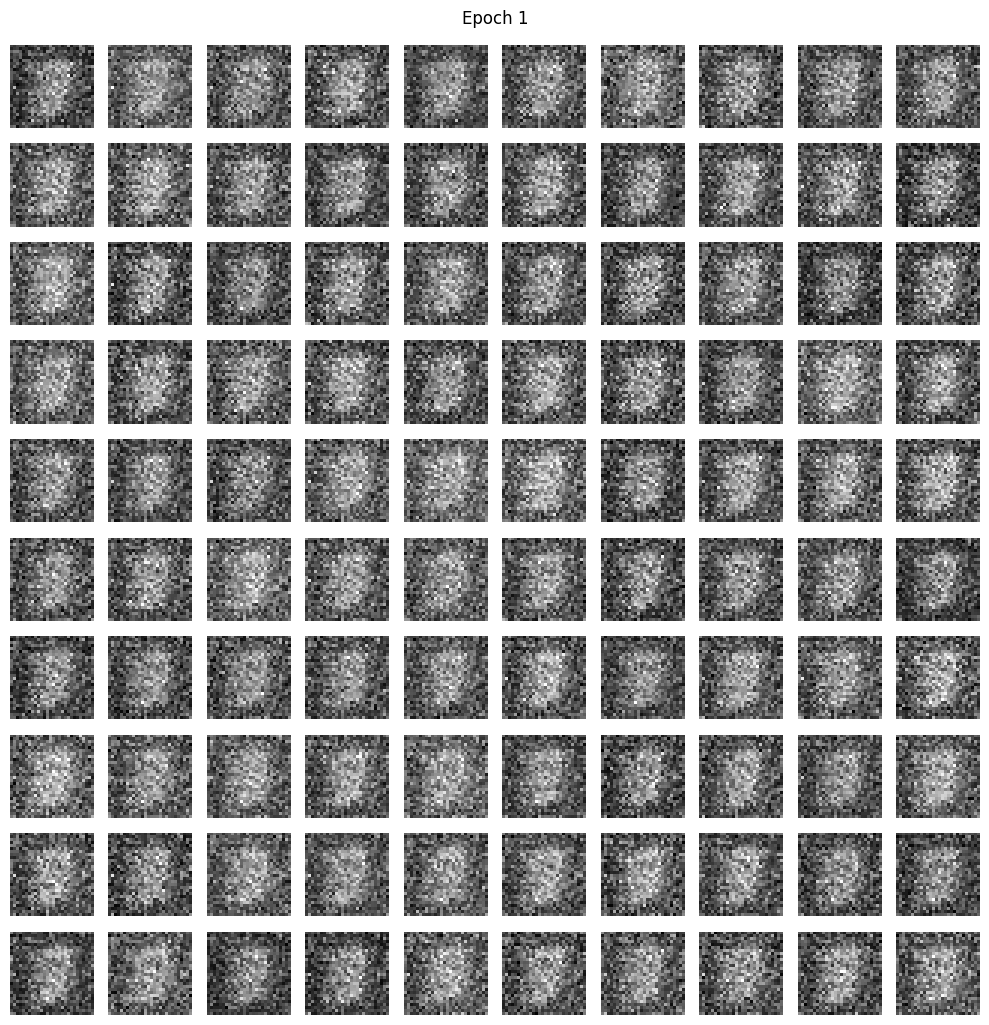

Epoch 2/400


100%|██████████| 128/128 [00:09<00:00, 13.11it/s]


Epoch 3/400


100%|██████████| 128/128 [00:09<00:00, 13.39it/s]


Epoch 4/400


100%|██████████| 128/128 [00:08<00:00, 14.29it/s]


Epoch 5/400


100%|██████████| 128/128 [00:09<00:00, 13.46it/s]


Epoch 6/400


100%|██████████| 128/128 [00:09<00:00, 13.32it/s]


Epoch 7/400


100%|██████████| 128/128 [00:09<00:00, 13.26it/s]


Epoch 8/400


100%|██████████| 128/128 [00:09<00:00, 13.99it/s]


Epoch 9/400


100%|██████████| 128/128 [00:09<00:00, 12.92it/s]


Epoch 10/400


100%|██████████| 128/128 [00:10<00:00, 11.95it/s]


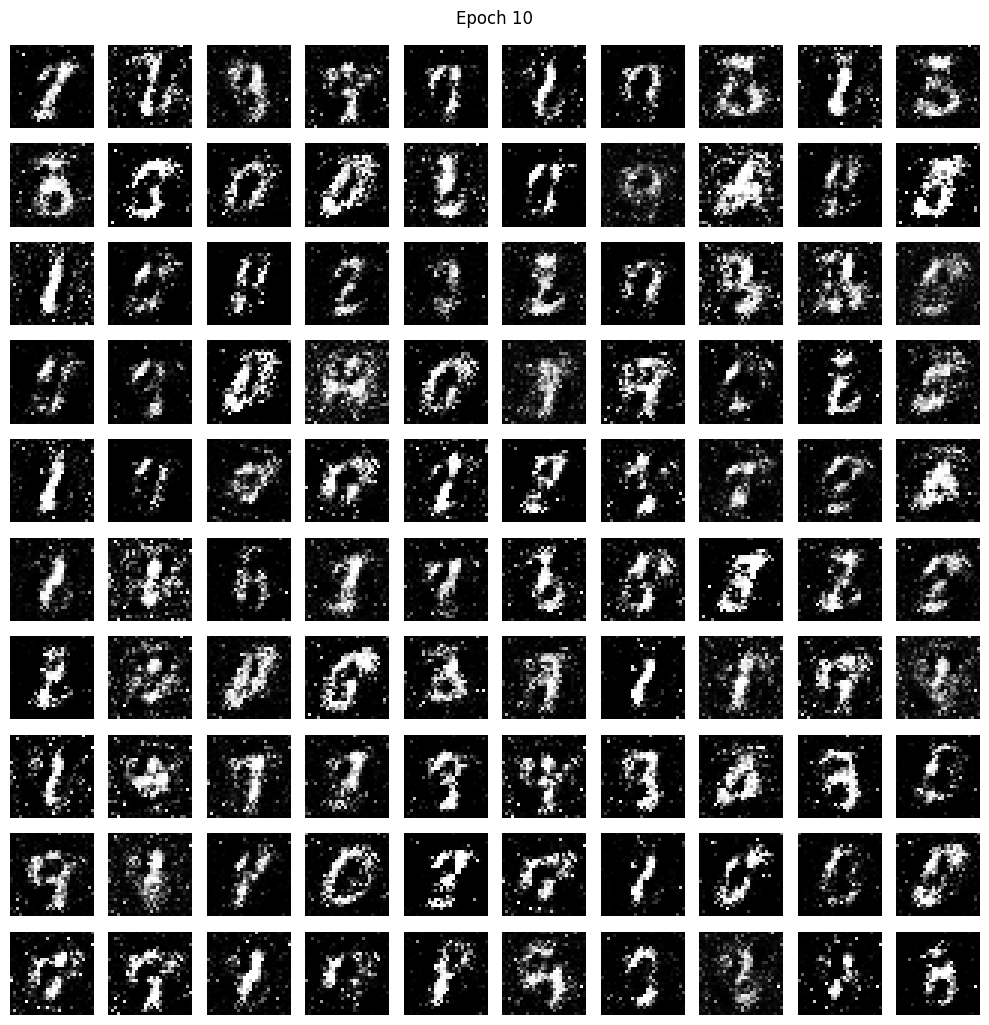

Epoch 11/400


100%|██████████| 128/128 [00:09<00:00, 13.19it/s]


Epoch 12/400


100%|██████████| 128/128 [00:09<00:00, 12.92it/s]


Epoch 13/400


100%|██████████| 128/128 [00:09<00:00, 13.22it/s]


Epoch 14/400


100%|██████████| 128/128 [00:09<00:00, 13.21it/s]


Epoch 15/400


100%|██████████| 128/128 [00:09<00:00, 14.18it/s]


Epoch 16/400


100%|██████████| 128/128 [00:09<00:00, 12.89it/s]


Epoch 17/400


100%|██████████| 128/128 [00:09<00:00, 13.45it/s]


Epoch 18/400


100%|██████████| 128/128 [00:09<00:00, 13.31it/s]


Epoch 19/400


100%|██████████| 128/128 [00:09<00:00, 13.40it/s]


Epoch 20/400


100%|██████████| 128/128 [00:08<00:00, 14.44it/s]


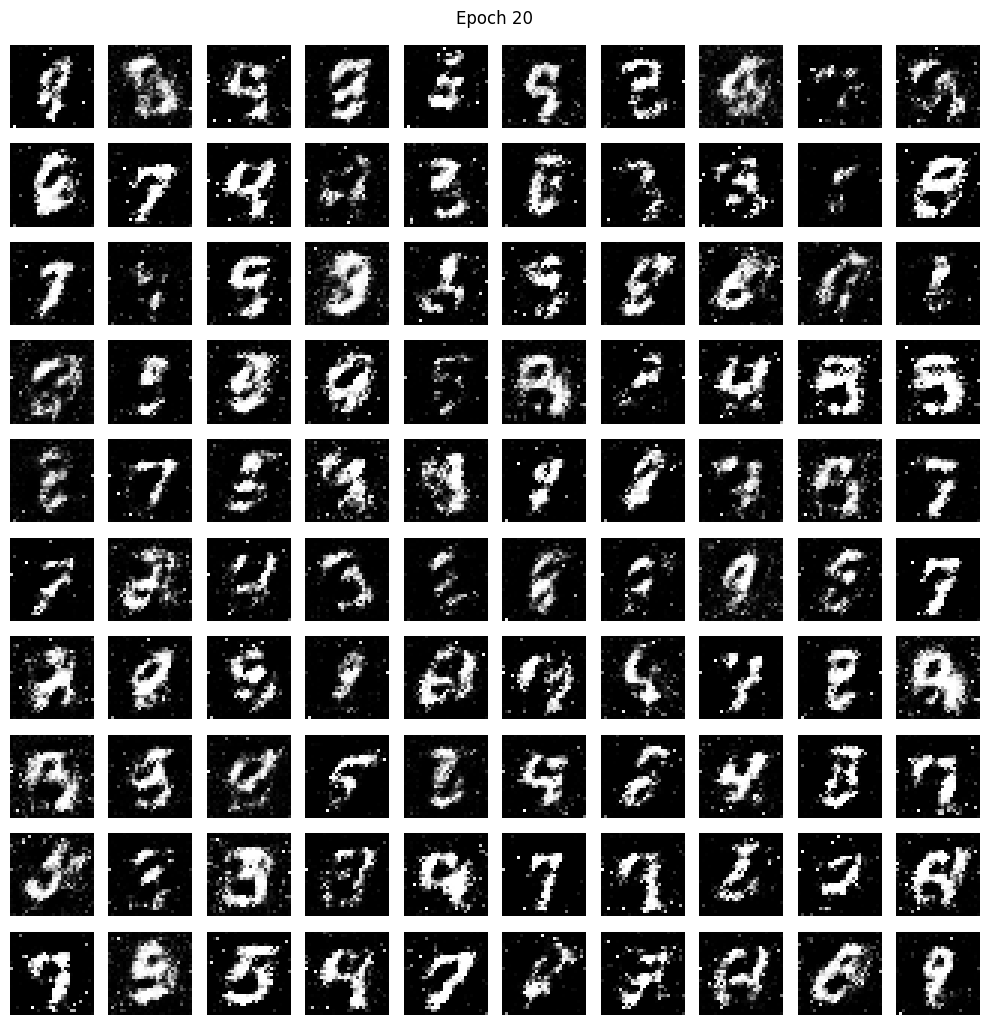

Epoch 21/400


100%|██████████| 128/128 [00:09<00:00, 12.93it/s]


Epoch 22/400


100%|██████████| 128/128 [00:10<00:00, 12.61it/s]


Epoch 23/400


100%|██████████| 128/128 [00:10<00:00, 12.78it/s]


Epoch 24/400


100%|██████████| 128/128 [00:09<00:00, 12.92it/s]


Epoch 25/400


100%|██████████| 128/128 [00:09<00:00, 13.18it/s]


Epoch 26/400


100%|██████████| 128/128 [00:09<00:00, 14.06it/s]


Epoch 27/400


100%|██████████| 128/128 [00:09<00:00, 12.96it/s]


Epoch 28/400


100%|██████████| 128/128 [00:09<00:00, 13.05it/s]


Epoch 29/400


100%|██████████| 128/128 [00:09<00:00, 13.01it/s]


Epoch 30/400


100%|██████████| 128/128 [00:10<00:00, 12.79it/s]


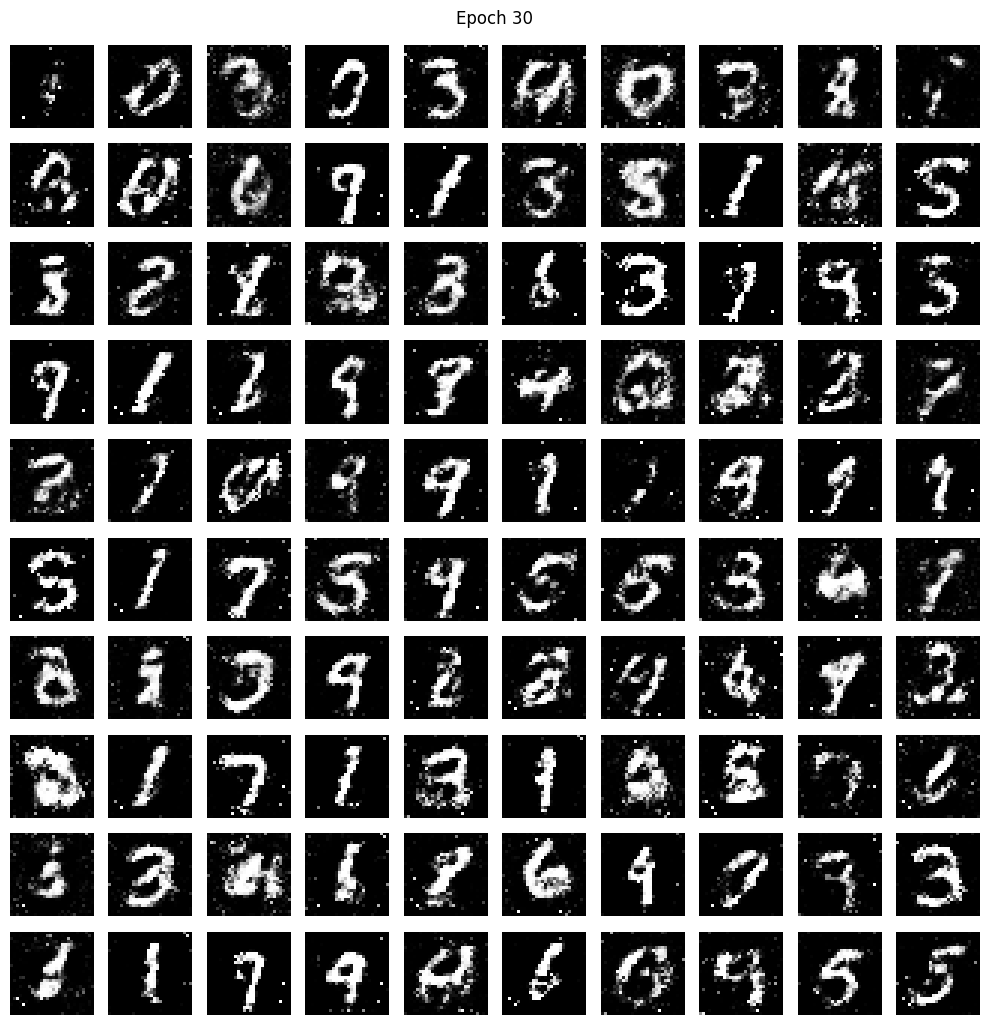

Epoch 31/400


100%|██████████| 128/128 [00:09<00:00, 12.93it/s]


Epoch 32/400


100%|██████████| 128/128 [00:09<00:00, 13.29it/s]


Epoch 33/400


100%|██████████| 128/128 [00:10<00:00, 12.48it/s]


Epoch 34/400


100%|██████████| 128/128 [00:10<00:00, 12.45it/s]


Epoch 35/400


100%|██████████| 128/128 [00:10<00:00, 12.63it/s]


Epoch 36/400


100%|██████████| 128/128 [00:10<00:00, 12.68it/s]


Epoch 37/400


100%|██████████| 128/128 [00:09<00:00, 13.03it/s]


Epoch 38/400


100%|██████████| 128/128 [00:09<00:00, 14.11it/s]


Epoch 39/400


100%|██████████| 128/128 [00:09<00:00, 13.06it/s]


Epoch 40/400


100%|██████████| 128/128 [00:10<00:00, 11.84it/s]


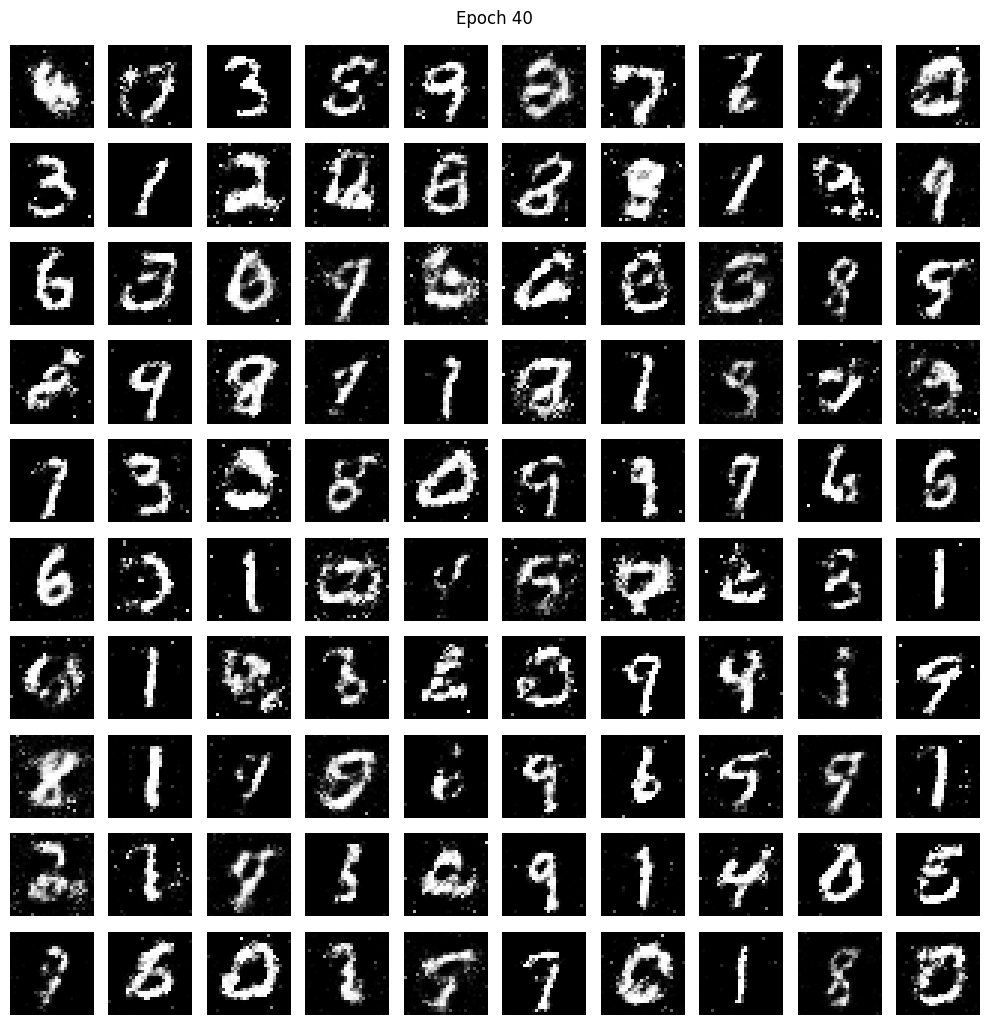

Epoch 41/400


100%|██████████| 128/128 [00:10<00:00, 12.66it/s]


Epoch 42/400


100%|██████████| 128/128 [00:10<00:00, 12.70it/s]


Epoch 43/400


100%|██████████| 128/128 [00:10<00:00, 12.66it/s]


Epoch 44/400


100%|██████████| 128/128 [00:09<00:00, 14.11it/s]


Epoch 45/400


100%|██████████| 128/128 [00:09<00:00, 12.87it/s]


Epoch 46/400


100%|██████████| 128/128 [00:09<00:00, 13.13it/s]


Epoch 47/400


100%|██████████| 128/128 [00:09<00:00, 13.12it/s]


Epoch 48/400


100%|██████████| 128/128 [00:09<00:00, 13.02it/s]


Epoch 49/400


100%|██████████| 128/128 [00:08<00:00, 14.24it/s]


Epoch 50/400


100%|██████████| 128/128 [00:10<00:00, 12.43it/s]


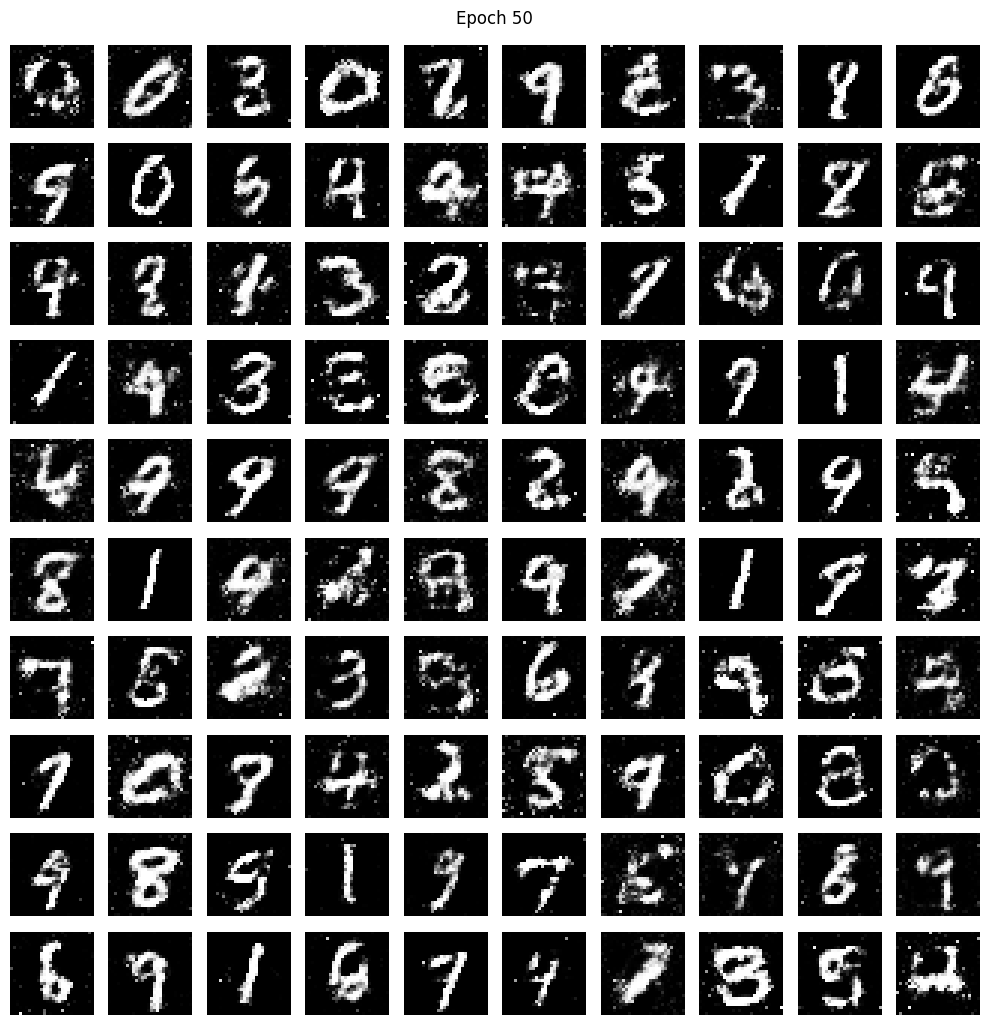

Epoch 51/400


100%|██████████| 128/128 [00:09<00:00, 12.89it/s]


Epoch 52/400


100%|██████████| 128/128 [00:09<00:00, 12.84it/s]


Epoch 53/400


100%|██████████| 128/128 [00:10<00:00, 12.77it/s]


Epoch 54/400


100%|██████████| 128/128 [00:10<00:00, 12.72it/s]


Epoch 55/400


100%|██████████| 128/128 [00:09<00:00, 13.92it/s]


Epoch 56/400


100%|██████████| 128/128 [00:10<00:00, 12.73it/s]


Epoch 57/400


100%|██████████| 128/128 [00:09<00:00, 12.91it/s]


Epoch 58/400


100%|██████████| 128/128 [00:09<00:00, 12.81it/s]


Epoch 59/400


100%|██████████| 128/128 [00:09<00:00, 13.01it/s]


Epoch 60/400


100%|██████████| 128/128 [00:09<00:00, 13.15it/s]


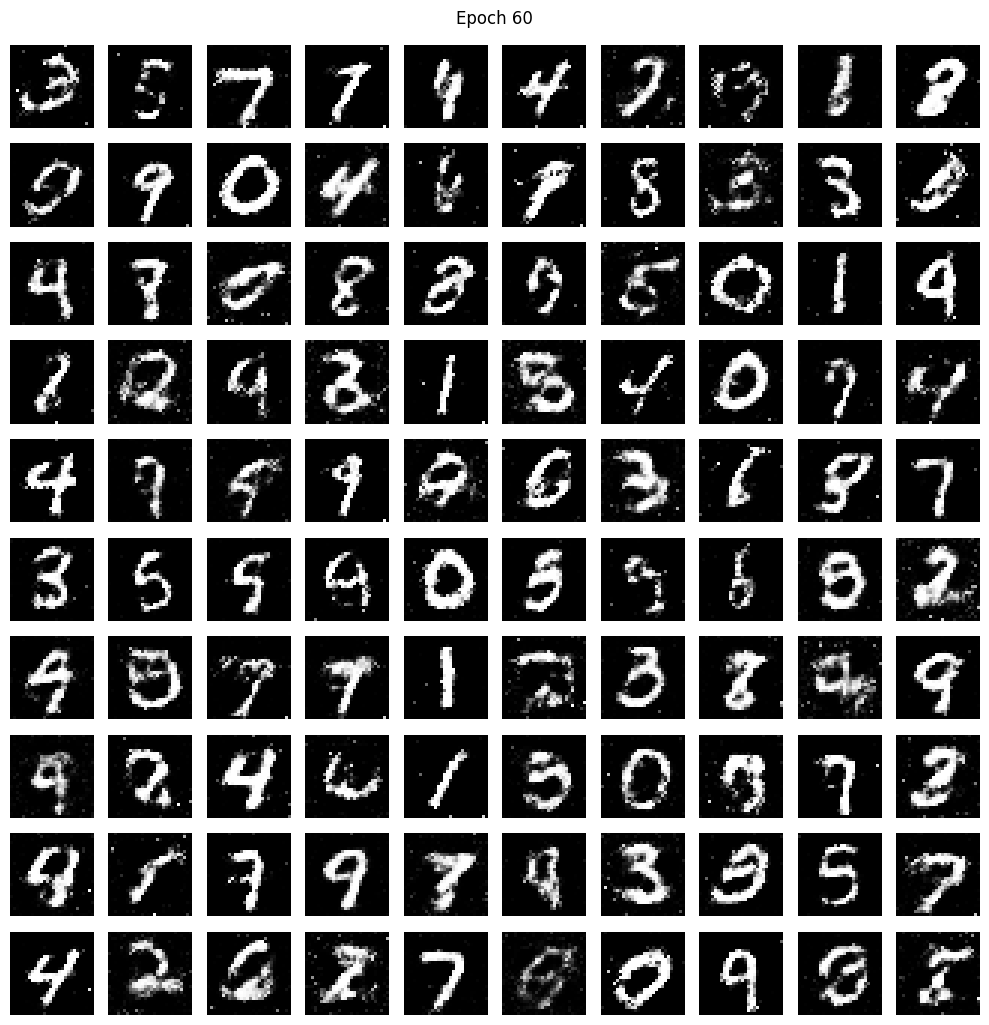

Epoch 61/400


100%|██████████| 128/128 [00:10<00:00, 12.34it/s]


Epoch 62/400


100%|██████████| 128/128 [00:09<00:00, 13.06it/s]


Epoch 63/400


100%|██████████| 128/128 [00:10<00:00, 12.27it/s]


Epoch 64/400


100%|██████████| 128/128 [00:10<00:00, 12.58it/s]


Epoch 65/400


100%|██████████| 128/128 [00:10<00:00, 12.63it/s]


Epoch 66/400


100%|██████████| 128/128 [00:10<00:00, 12.79it/s]


Epoch 67/400


100%|██████████| 128/128 [00:09<00:00, 13.10it/s]


Epoch 68/400


100%|██████████| 128/128 [00:09<00:00, 13.74it/s]


Epoch 69/400


100%|██████████| 128/128 [00:11<00:00, 11.61it/s]


Epoch 70/400


100%|██████████| 128/128 [00:09<00:00, 12.81it/s]


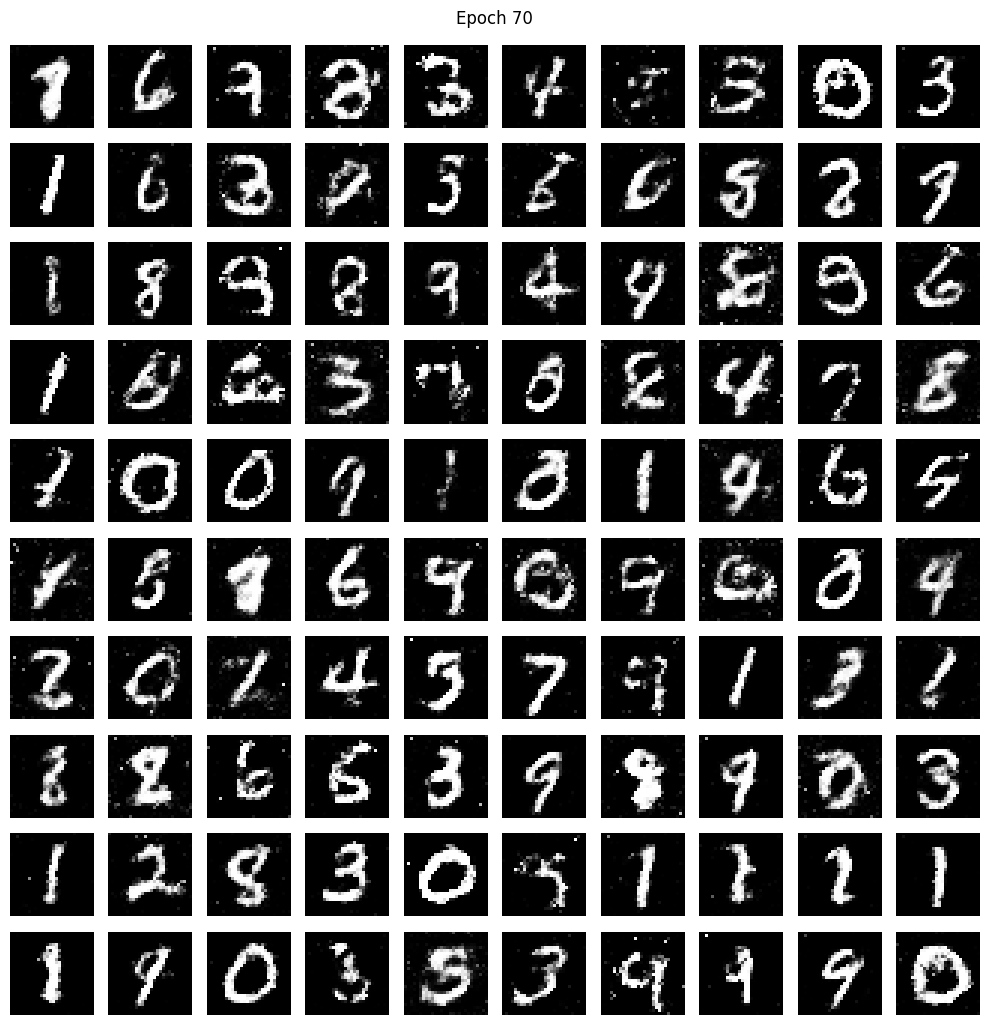

Epoch 71/400


100%|██████████| 128/128 [00:10<00:00, 12.68it/s]


Epoch 72/400


100%|██████████| 128/128 [00:10<00:00, 12.36it/s]


Epoch 73/400


100%|██████████| 128/128 [00:10<00:00, 12.28it/s]


Epoch 74/400


100%|██████████| 128/128 [00:10<00:00, 12.38it/s]


Epoch 75/400


100%|██████████| 128/128 [00:09<00:00, 12.94it/s]


Epoch 76/400


100%|██████████| 128/128 [00:10<00:00, 12.28it/s]


Epoch 77/400


100%|██████████| 128/128 [00:10<00:00, 12.60it/s]


Epoch 78/400


100%|██████████| 128/128 [00:10<00:00, 12.52it/s]


Epoch 79/400


100%|██████████| 128/128 [00:10<00:00, 12.55it/s]


Epoch 80/400


100%|██████████| 128/128 [00:10<00:00, 12.58it/s]


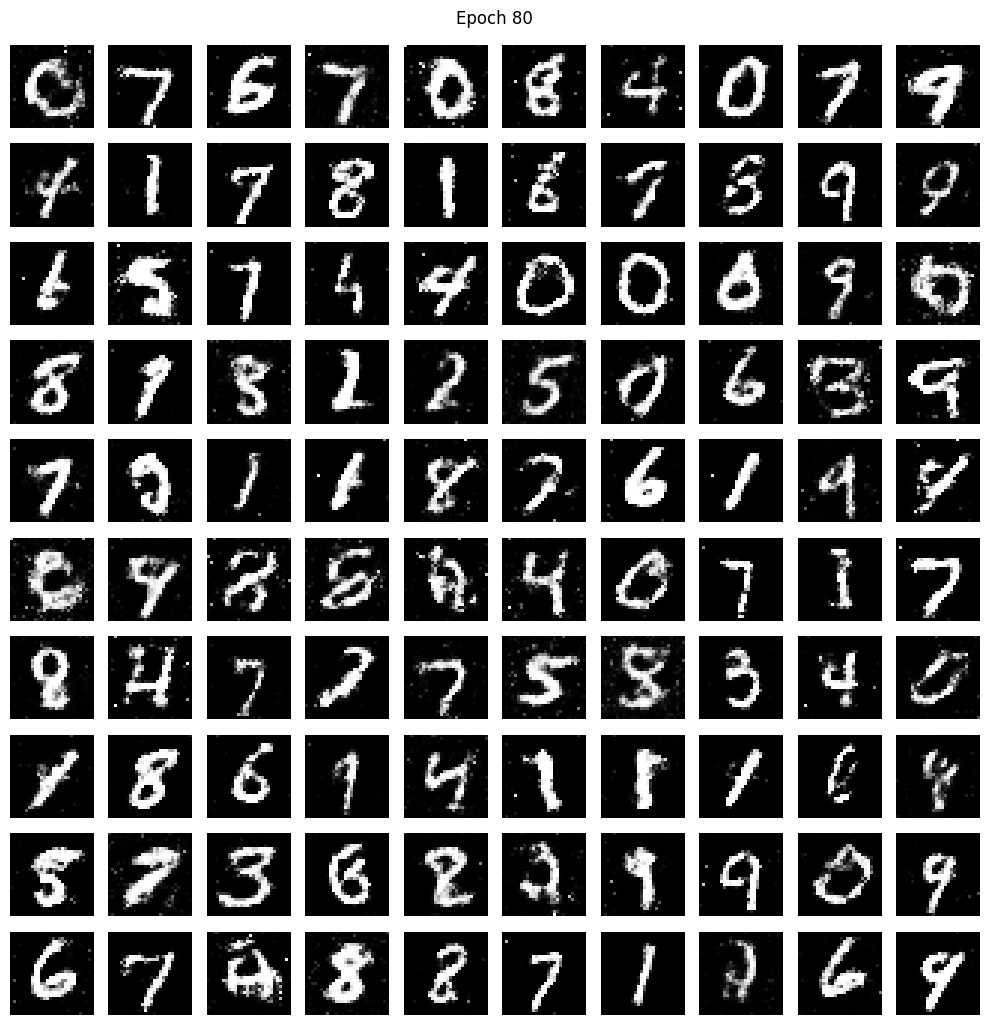

Epoch 81/400


100%|██████████| 128/128 [00:10<00:00, 12.44it/s]


Epoch 82/400


100%|██████████| 128/128 [00:09<00:00, 13.16it/s]


Epoch 83/400


100%|██████████| 128/128 [00:10<00:00, 12.37it/s]


Epoch 84/400


100%|██████████| 128/128 [00:10<00:00, 12.59it/s]


Epoch 85/400


100%|██████████| 128/128 [00:10<00:00, 12.65it/s]


Epoch 86/400


100%|██████████| 128/128 [00:10<00:00, 12.76it/s]


Epoch 87/400


100%|██████████| 128/128 [00:10<00:00, 12.69it/s]


Epoch 88/400


100%|██████████| 128/128 [00:09<00:00, 13.55it/s]


Epoch 89/400


100%|██████████| 128/128 [00:10<00:00, 12.78it/s]


Epoch 90/400


100%|██████████| 128/128 [00:09<00:00, 12.96it/s]


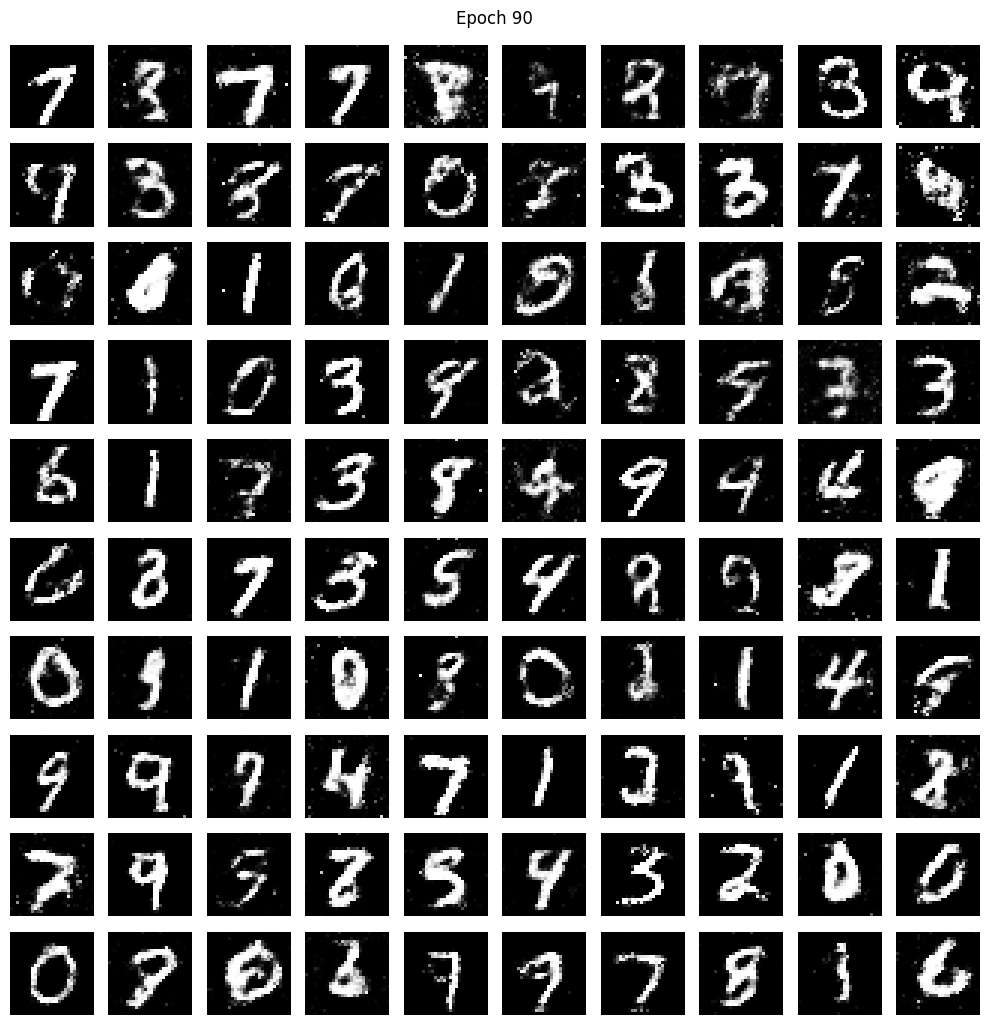

Epoch 91/400


100%|██████████| 128/128 [00:10<00:00, 12.59it/s]


Epoch 92/400


100%|██████████| 128/128 [00:10<00:00, 11.79it/s]


Epoch 93/400


100%|██████████| 128/128 [00:10<00:00, 12.43it/s]


Epoch 94/400


100%|██████████| 128/128 [00:10<00:00, 12.26it/s]


Epoch 95/400


100%|██████████| 128/128 [00:09<00:00, 12.96it/s]


Epoch 96/400


100%|██████████| 128/128 [00:10<00:00, 12.51it/s]


Epoch 97/400


100%|██████████| 128/128 [00:10<00:00, 12.50it/s]


Epoch 98/400


100%|██████████| 128/128 [00:11<00:00, 11.45it/s]


Epoch 99/400


100%|██████████| 128/128 [00:10<00:00, 12.51it/s]


Epoch 100/400


100%|██████████| 128/128 [00:09<00:00, 12.82it/s]


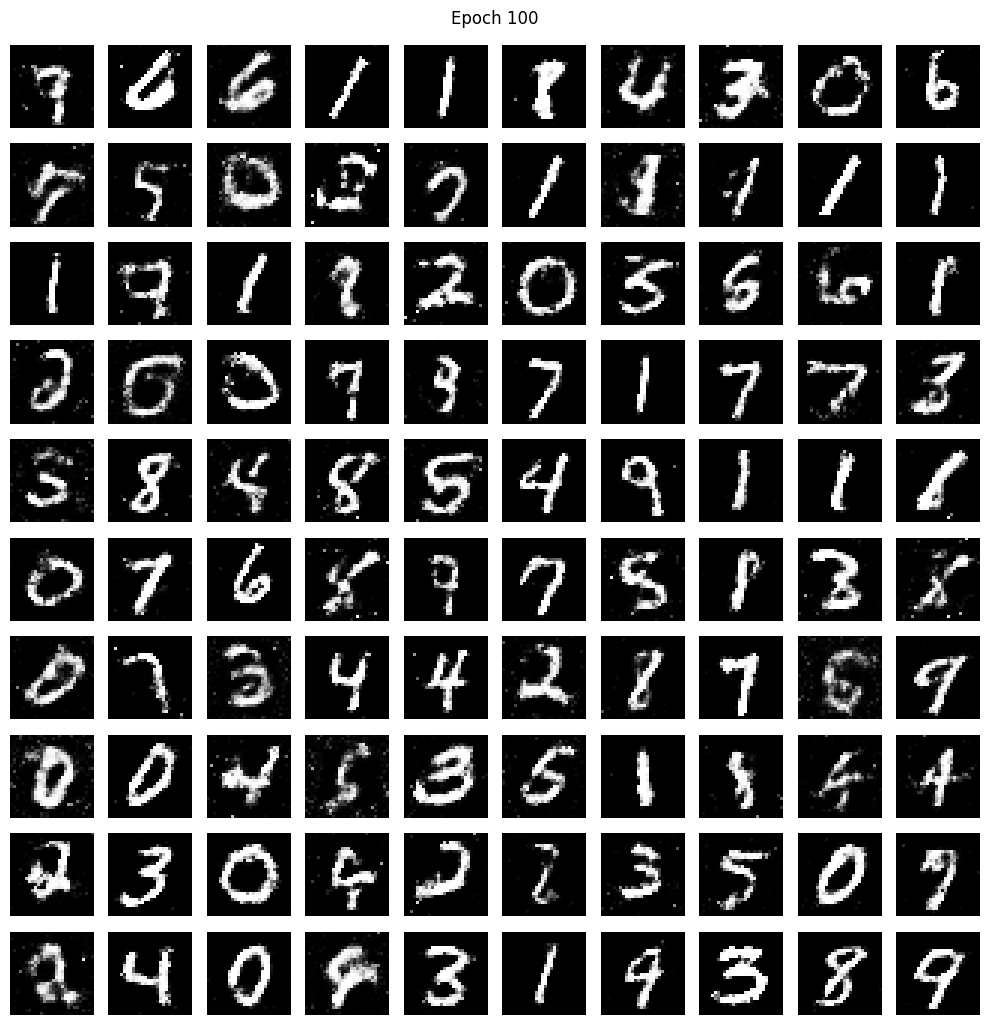

Epoch 101/400


100%|██████████| 128/128 [00:10<00:00, 11.99it/s]


Epoch 102/400


100%|██████████| 128/128 [00:10<00:00, 12.73it/s]


Epoch 103/400


100%|██████████| 128/128 [00:09<00:00, 12.88it/s]


Epoch 104/400


100%|██████████| 128/128 [00:10<00:00, 12.46it/s]


Epoch 105/400


100%|██████████| 128/128 [00:10<00:00, 12.53it/s]


Epoch 106/400


100%|██████████| 128/128 [00:10<00:00, 12.59it/s]


Epoch 107/400


100%|██████████| 128/128 [00:10<00:00, 12.63it/s]


Epoch 108/400


100%|██████████| 128/128 [00:09<00:00, 13.10it/s]


Epoch 109/400


100%|██████████| 128/128 [00:09<00:00, 13.28it/s]


Epoch 110/400


100%|██████████| 128/128 [00:10<00:00, 12.23it/s]


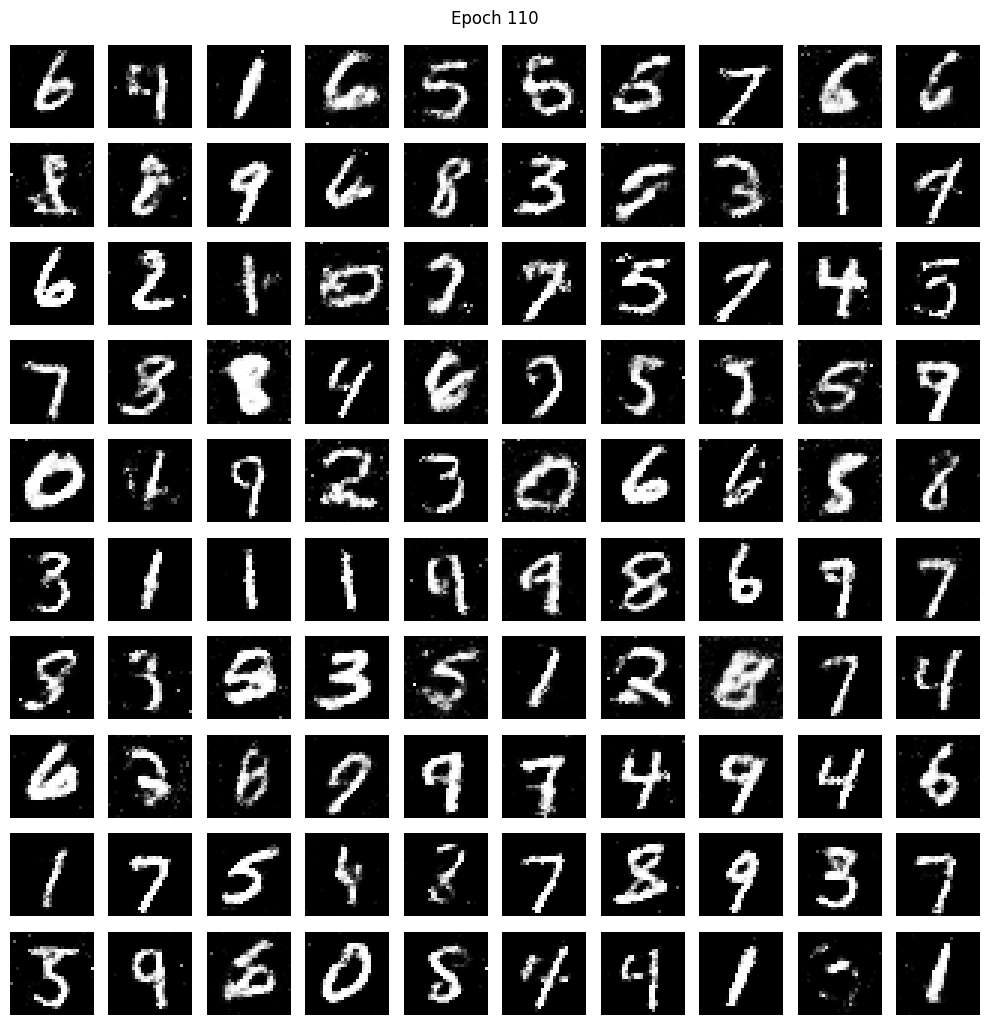

Epoch 111/400


100%|██████████| 128/128 [00:10<00:00, 12.42it/s]


Epoch 112/400


100%|██████████| 128/128 [00:10<00:00, 12.49it/s]


Epoch 113/400


100%|██████████| 128/128 [00:10<00:00, 12.38it/s]


Epoch 114/400


100%|██████████| 128/128 [00:10<00:00, 12.30it/s]


Epoch 115/400


100%|██████████| 128/128 [00:09<00:00, 13.42it/s]


Epoch 116/400


100%|██████████| 128/128 [00:10<00:00, 12.72it/s]


Epoch 117/400


100%|██████████| 128/128 [00:10<00:00, 12.64it/s]


Epoch 118/400


100%|██████████| 128/128 [00:10<00:00, 12.36it/s]


Epoch 119/400


100%|██████████| 128/128 [00:10<00:00, 12.52it/s]


Epoch 120/400


100%|██████████| 128/128 [00:10<00:00, 12.63it/s]


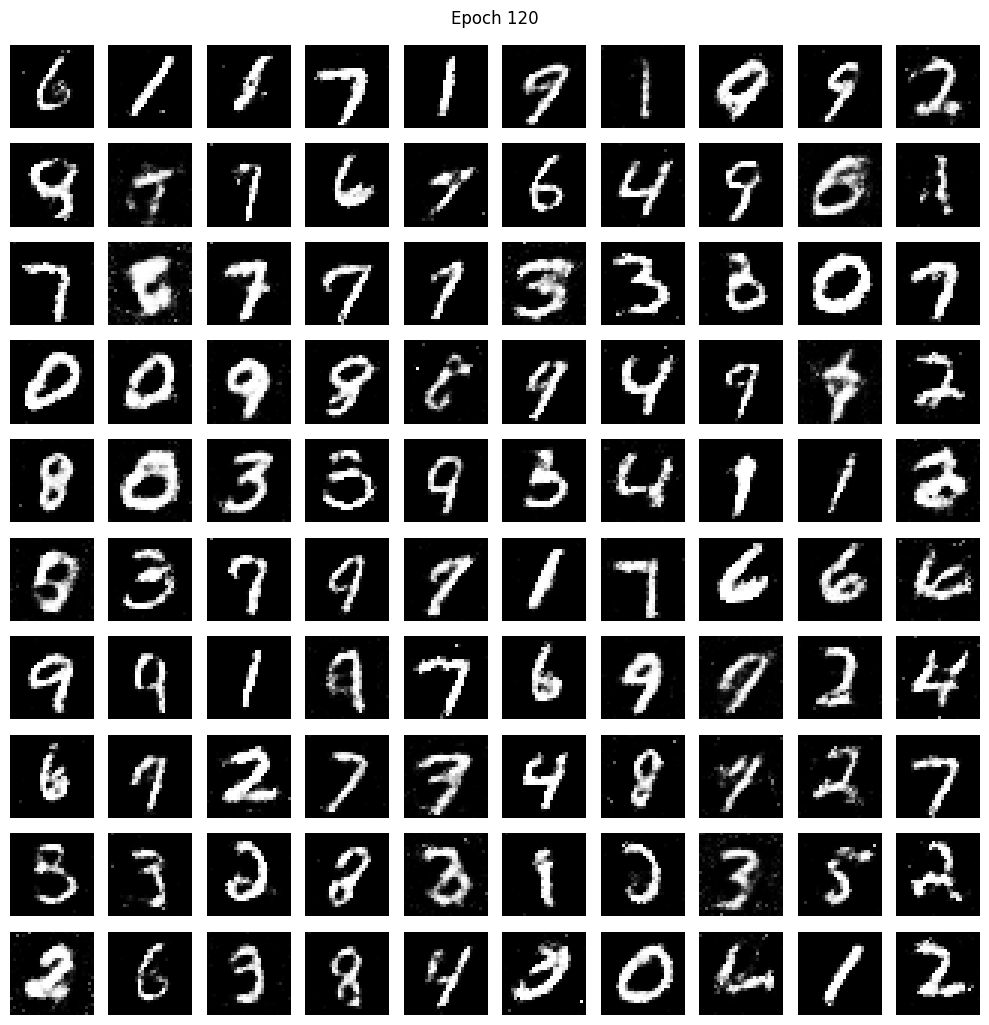

Epoch 121/400


100%|██████████| 128/128 [00:10<00:00, 11.80it/s]


Epoch 122/400


100%|██████████| 128/128 [00:10<00:00, 12.61it/s]


Epoch 123/400


100%|██████████| 128/128 [00:10<00:00, 12.52it/s]


Epoch 124/400


100%|██████████| 128/128 [00:10<00:00, 12.25it/s]


Epoch 125/400


100%|██████████| 128/128 [00:10<00:00, 12.38it/s]


Epoch 126/400


100%|██████████| 128/128 [00:11<00:00, 11.49it/s]


Epoch 127/400


100%|██████████| 128/128 [00:10<00:00, 12.23it/s]


Epoch 128/400


100%|██████████| 128/128 [00:10<00:00, 12.30it/s]


Epoch 129/400


100%|██████████| 128/128 [00:09<00:00, 13.29it/s]


Epoch 130/400


100%|██████████| 128/128 [00:09<00:00, 12.84it/s]


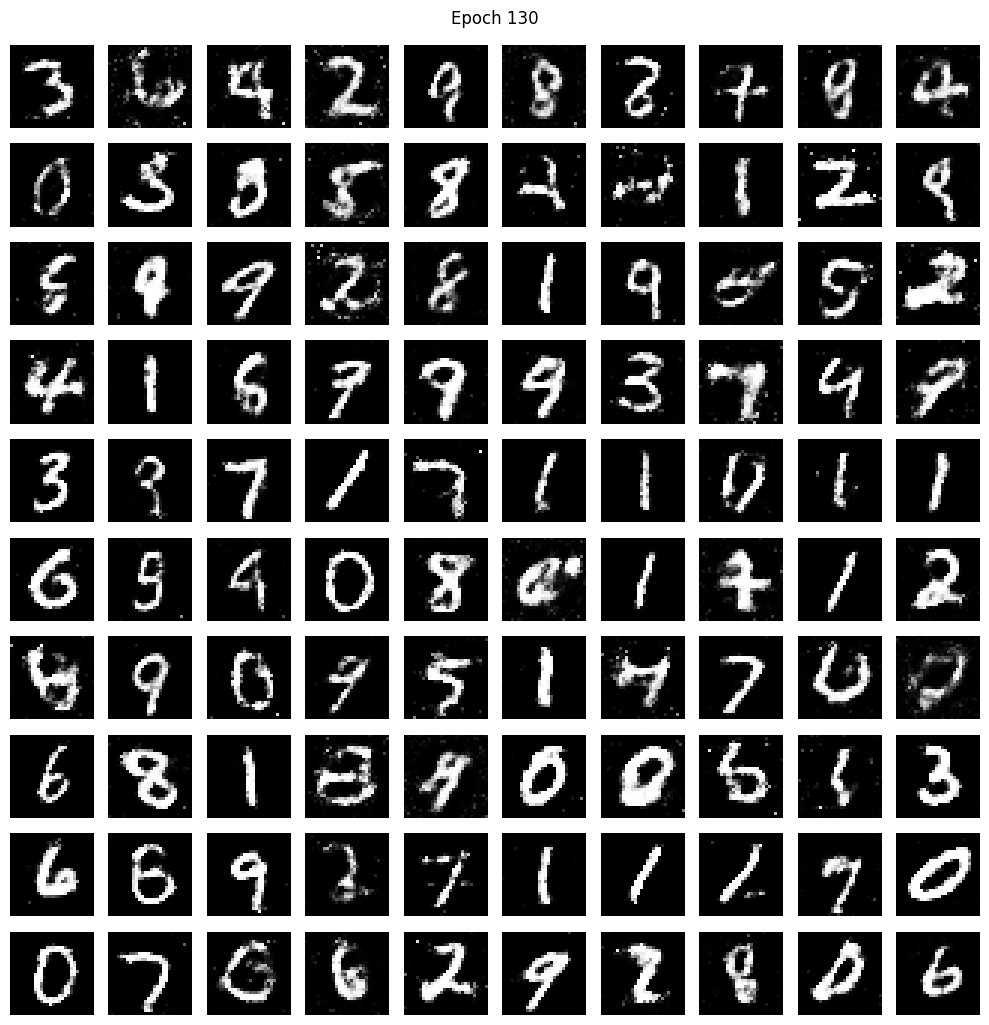

Epoch 131/400


100%|██████████| 128/128 [00:10<00:00, 11.94it/s]


Epoch 132/400


100%|██████████| 128/128 [00:10<00:00, 12.13it/s]


Epoch 133/400


100%|██████████| 128/128 [00:10<00:00, 11.69it/s]


Epoch 134/400


100%|██████████| 128/128 [00:10<00:00, 11.81it/s]


Epoch 135/400


100%|██████████| 128/128 [00:10<00:00, 12.05it/s]


Epoch 136/400


100%|██████████| 128/128 [00:10<00:00, 11.93it/s]


Epoch 137/400


100%|██████████| 128/128 [00:10<00:00, 12.27it/s]


Epoch 138/400


100%|██████████| 128/128 [00:09<00:00, 13.22it/s]


Epoch 139/400


100%|██████████| 128/128 [00:10<00:00, 12.18it/s]


Epoch 140/400


100%|██████████| 128/128 [00:10<00:00, 12.19it/s]


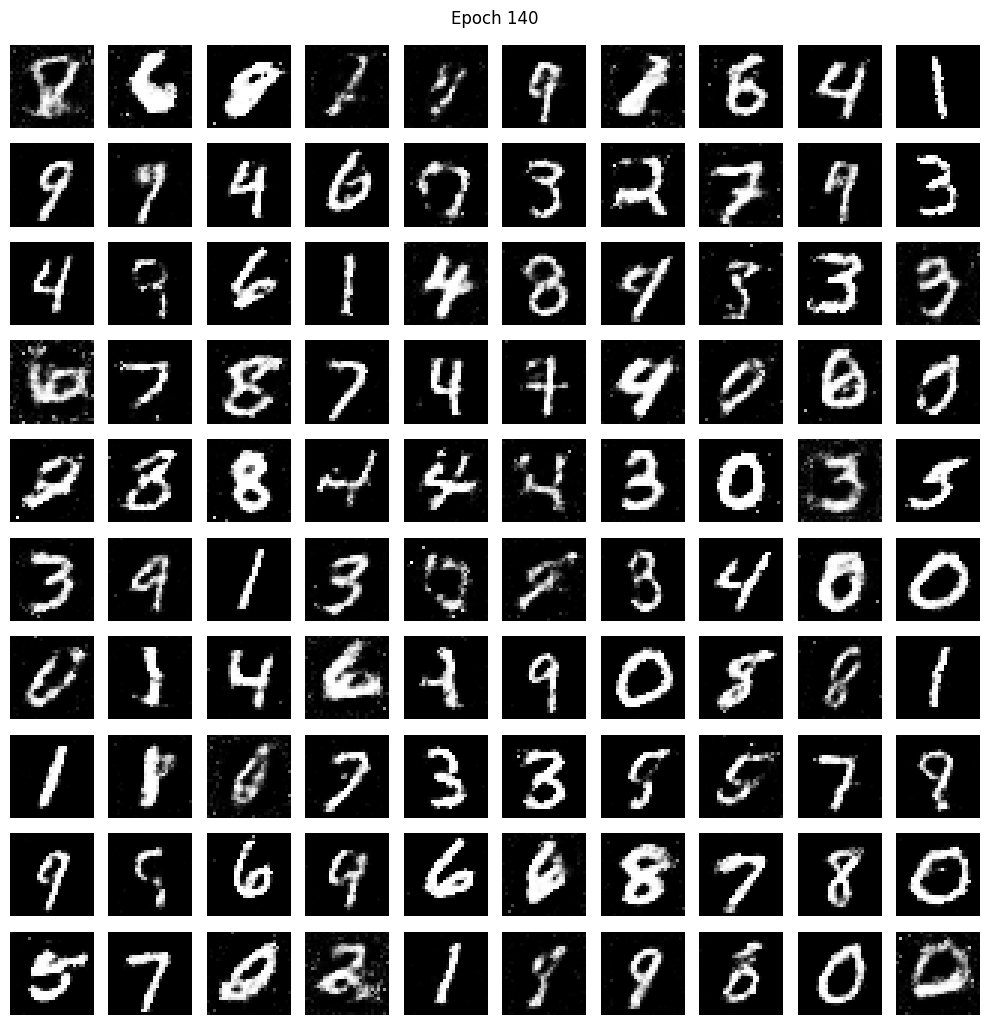

Epoch 141/400


100%|██████████| 128/128 [00:10<00:00, 11.84it/s]


Epoch 142/400


100%|██████████| 128/128 [00:10<00:00, 12.12it/s]


Epoch 143/400


100%|██████████| 128/128 [00:10<00:00, 12.21it/s]


Epoch 144/400


100%|██████████| 128/128 [00:10<00:00, 12.29it/s]


Epoch 145/400


100%|██████████| 128/128 [00:09<00:00, 13.27it/s]


Epoch 146/400


100%|██████████| 128/128 [00:10<00:00, 12.47it/s]


Epoch 147/400


100%|██████████| 128/128 [00:10<00:00, 12.38it/s]


Epoch 148/400


100%|██████████| 128/128 [00:10<00:00, 12.19it/s]


Epoch 149/400


100%|██████████| 128/128 [00:10<00:00, 12.55it/s]


Epoch 150/400


100%|██████████| 128/128 [00:10<00:00, 12.59it/s]


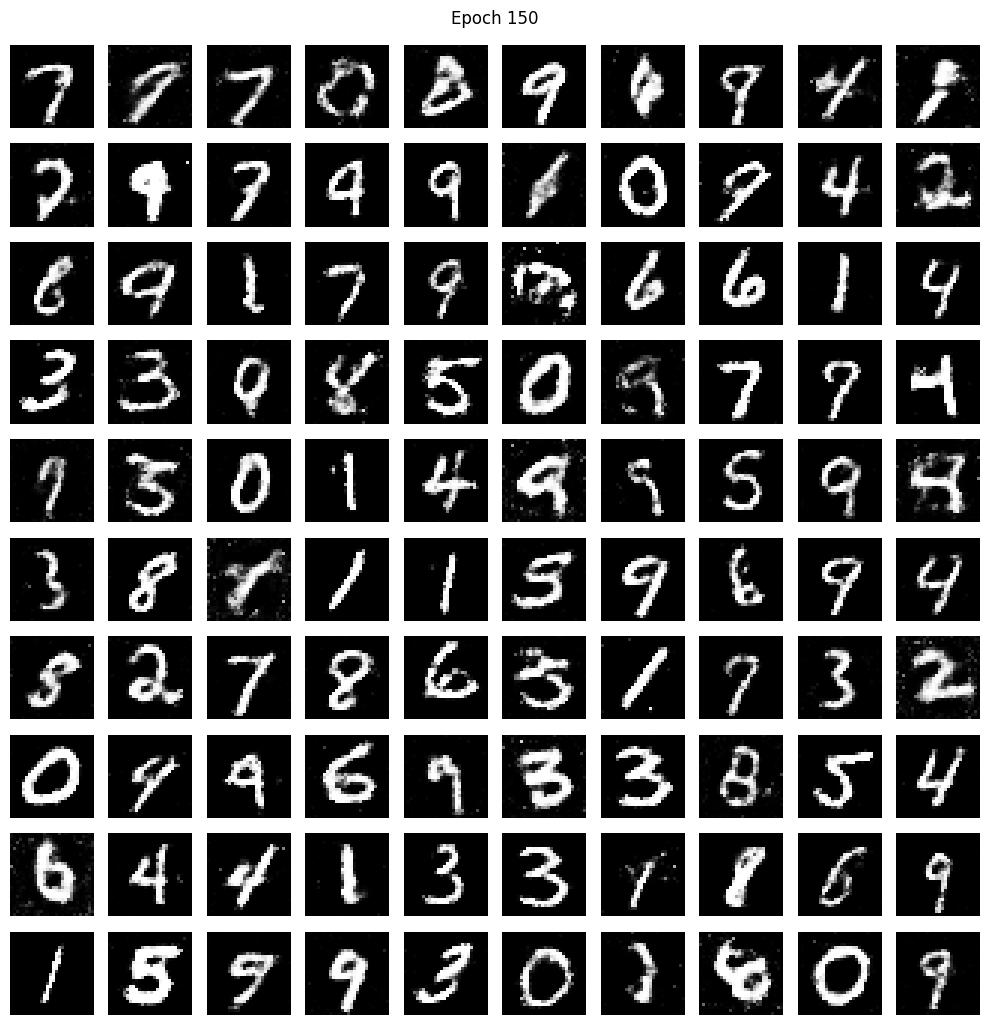

Epoch 151/400


100%|██████████| 128/128 [00:10<00:00, 12.24it/s]


Epoch 152/400


100%|██████████| 128/128 [00:10<00:00, 11.82it/s]


Epoch 153/400


100%|██████████| 128/128 [00:11<00:00, 11.27it/s]


Epoch 154/400


100%|██████████| 128/128 [00:10<00:00, 11.96it/s]


Epoch 155/400


100%|██████████| 128/128 [00:10<00:00, 11.99it/s]


Epoch 156/400


100%|██████████| 128/128 [00:10<00:00, 12.19it/s]


Epoch 157/400


100%|██████████| 128/128 [00:10<00:00, 12.14it/s]


Epoch 158/400


100%|██████████| 128/128 [00:10<00:00, 12.22it/s]


Epoch 159/400


100%|██████████| 128/128 [00:10<00:00, 12.21it/s]


Epoch 160/400


100%|██████████| 128/128 [00:09<00:00, 13.64it/s]


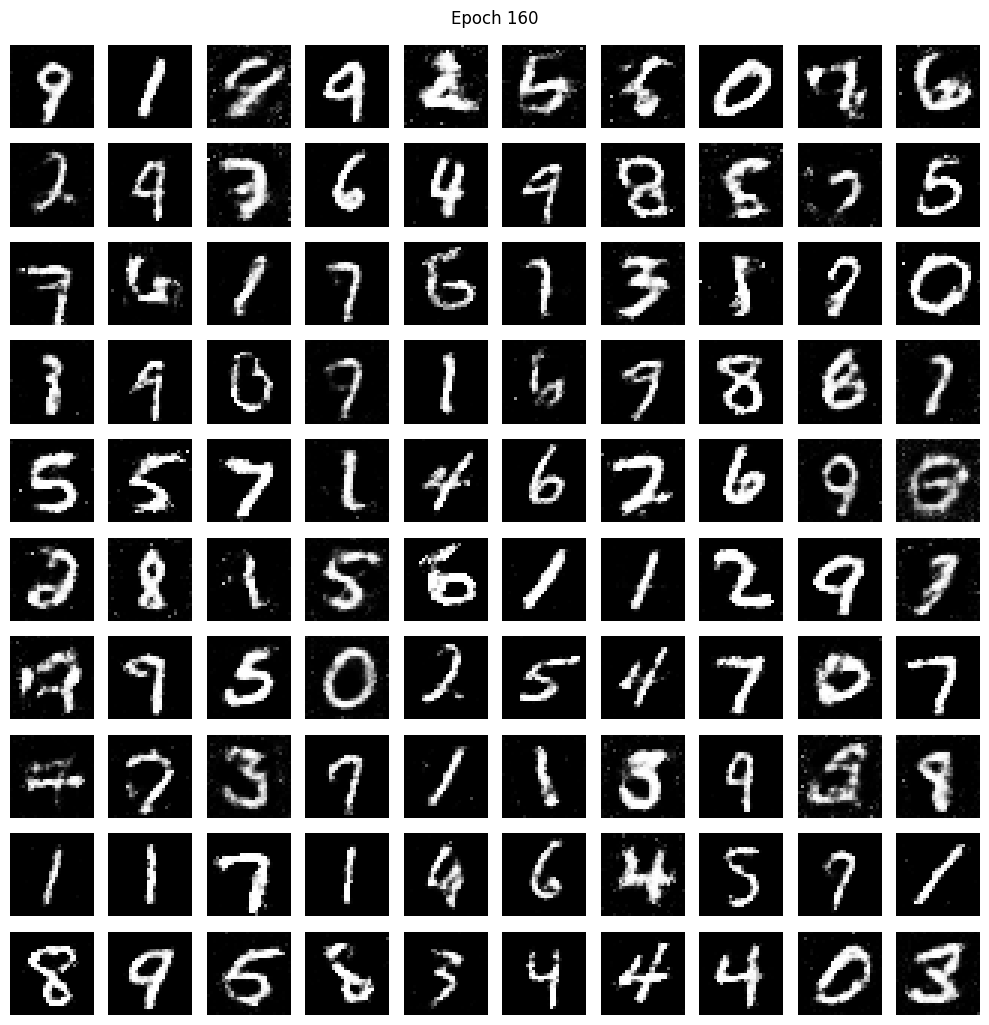

Epoch 161/400


100%|██████████| 128/128 [00:09<00:00, 12.99it/s]


Epoch 162/400


100%|██████████| 128/128 [00:10<00:00, 12.05it/s]


Epoch 163/400


100%|██████████| 128/128 [00:10<00:00, 12.30it/s]


Epoch 164/400


100%|██████████| 128/128 [00:10<00:00, 11.89it/s]


Epoch 165/400


100%|██████████| 128/128 [00:10<00:00, 12.05it/s]


Epoch 166/400


100%|██████████| 128/128 [00:10<00:00, 12.19it/s]


Epoch 167/400


100%|██████████| 128/128 [00:10<00:00, 12.22it/s]


Epoch 168/400


100%|██████████| 128/128 [00:09<00:00, 13.57it/s]


Epoch 169/400


100%|██████████| 128/128 [00:10<00:00, 12.30it/s]


Epoch 170/400


100%|██████████| 128/128 [00:10<00:00, 11.96it/s]


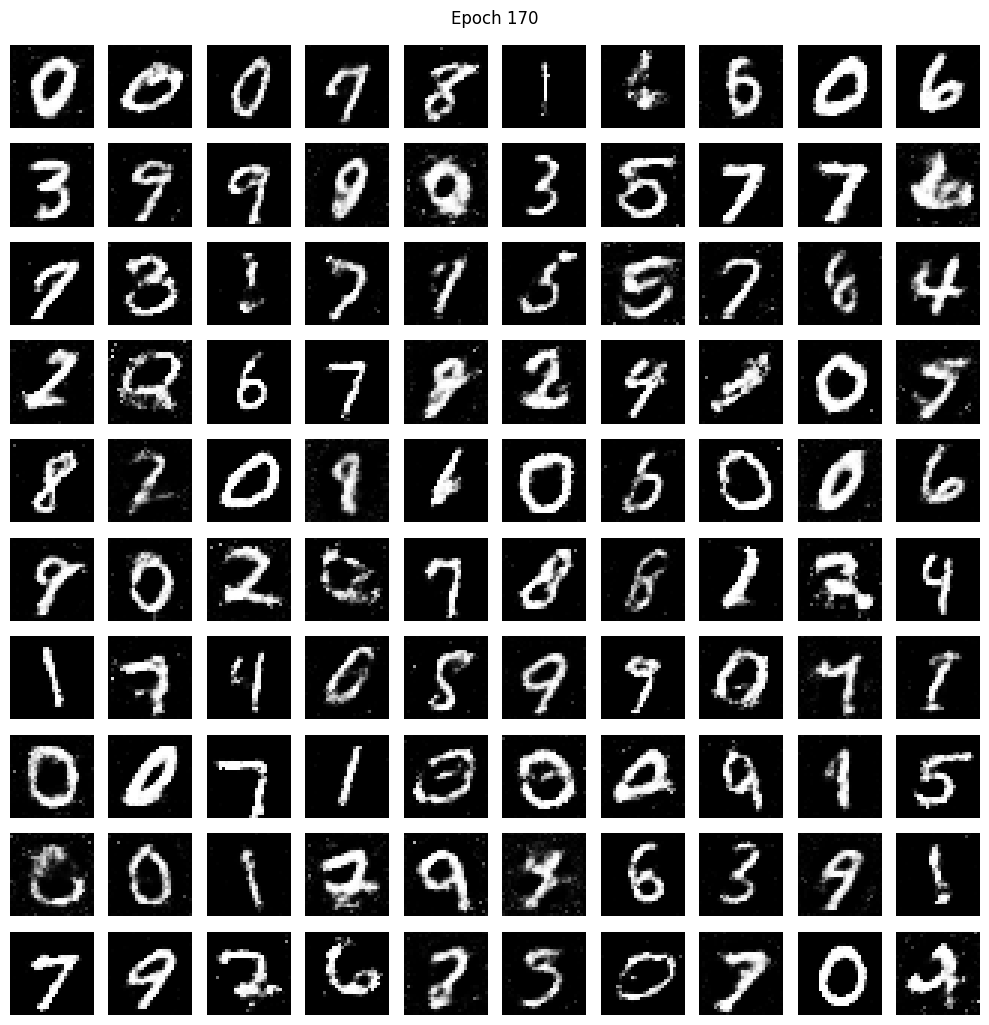

Epoch 171/400


100%|██████████| 128/128 [00:10<00:00, 11.72it/s]


Epoch 172/400


100%|██████████| 128/128 [00:10<00:00, 12.27it/s]


Epoch 173/400


100%|██████████| 128/128 [00:10<00:00, 12.10it/s]


Epoch 174/400


100%|██████████| 128/128 [00:10<00:00, 12.19it/s]


Epoch 175/400


100%|██████████| 128/128 [00:10<00:00, 12.74it/s]


Epoch 176/400


100%|██████████| 128/128 [00:10<00:00, 12.64it/s]


Epoch 177/400


100%|██████████| 128/128 [00:10<00:00, 12.03it/s]


Epoch 178/400


100%|██████████| 128/128 [00:10<00:00, 12.27it/s]


Epoch 179/400


100%|██████████| 128/128 [00:10<00:00, 12.35it/s]


Epoch 180/400


100%|██████████| 128/128 [00:11<00:00, 11.36it/s]


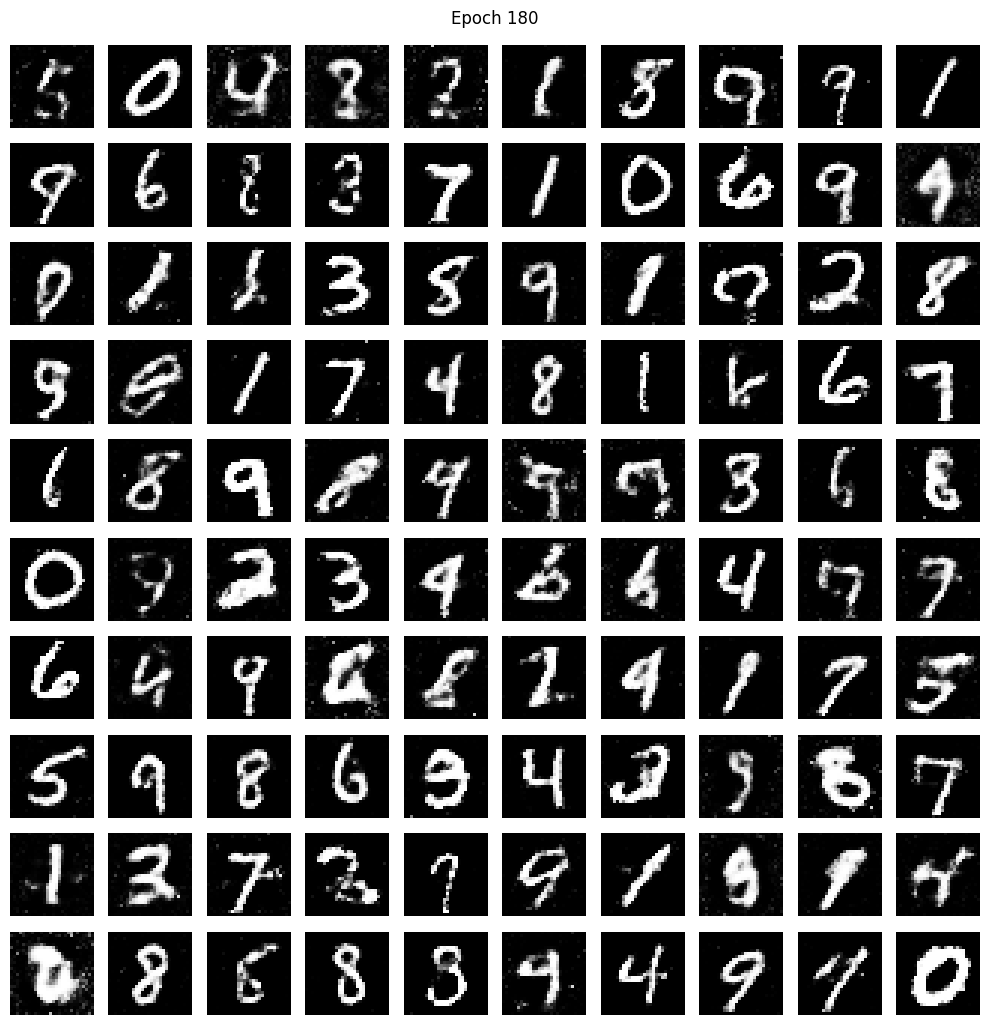

Epoch 181/400


100%|██████████| 128/128 [00:10<00:00, 11.78it/s]


Epoch 182/400


100%|██████████| 128/128 [00:10<00:00, 11.72it/s]


Epoch 183/400


100%|██████████| 128/128 [00:10<00:00, 11.71it/s]


Epoch 184/400


100%|██████████| 128/128 [00:10<00:00, 12.69it/s]


Epoch 185/400


100%|██████████| 128/128 [00:10<00:00, 11.98it/s]


Epoch 186/400


100%|██████████| 128/128 [00:10<00:00, 12.05it/s]


Epoch 187/400


100%|██████████| 128/128 [00:10<00:00, 12.10it/s]


Epoch 188/400


100%|██████████| 128/128 [00:10<00:00, 12.22it/s]


Epoch 189/400


100%|██████████| 128/128 [00:10<00:00, 12.38it/s]


Epoch 190/400


100%|██████████| 128/128 [00:10<00:00, 12.68it/s]


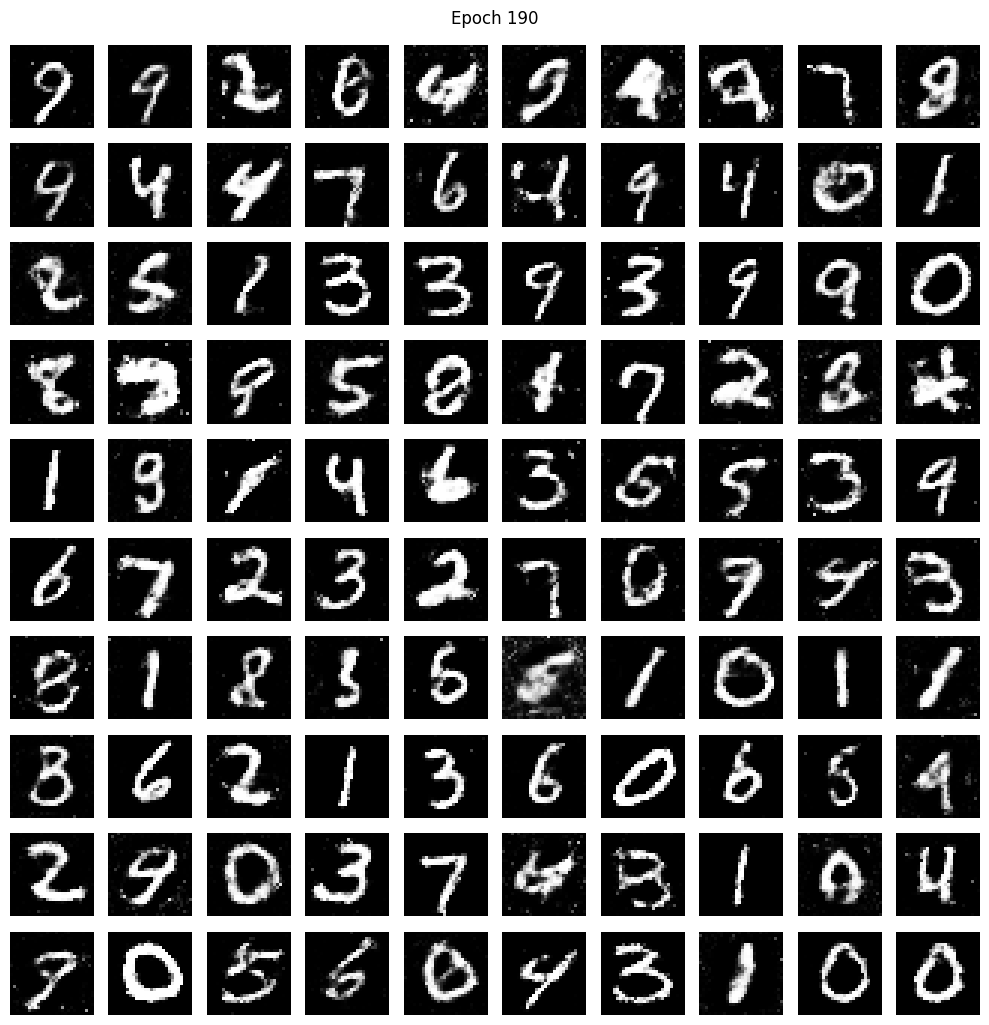

Epoch 191/400


100%|██████████| 128/128 [00:10<00:00, 12.19it/s]


Epoch 192/400


100%|██████████| 128/128 [00:10<00:00, 12.56it/s]


Epoch 193/400


100%|██████████| 128/128 [00:11<00:00, 11.44it/s]


Epoch 194/400


100%|██████████| 128/128 [00:11<00:00, 11.61it/s]


Epoch 195/400


100%|██████████| 128/128 [00:11<00:00, 11.61it/s]


Epoch 196/400


100%|██████████| 128/128 [00:11<00:00, 11.50it/s]


Epoch 197/400


100%|██████████| 128/128 [00:10<00:00, 11.83it/s]


Epoch 198/400


100%|██████████| 128/128 [00:10<00:00, 12.05it/s]


Epoch 199/400


100%|██████████| 128/128 [00:10<00:00, 12.33it/s]


Epoch 200/400


100%|██████████| 128/128 [00:09<00:00, 12.92it/s]


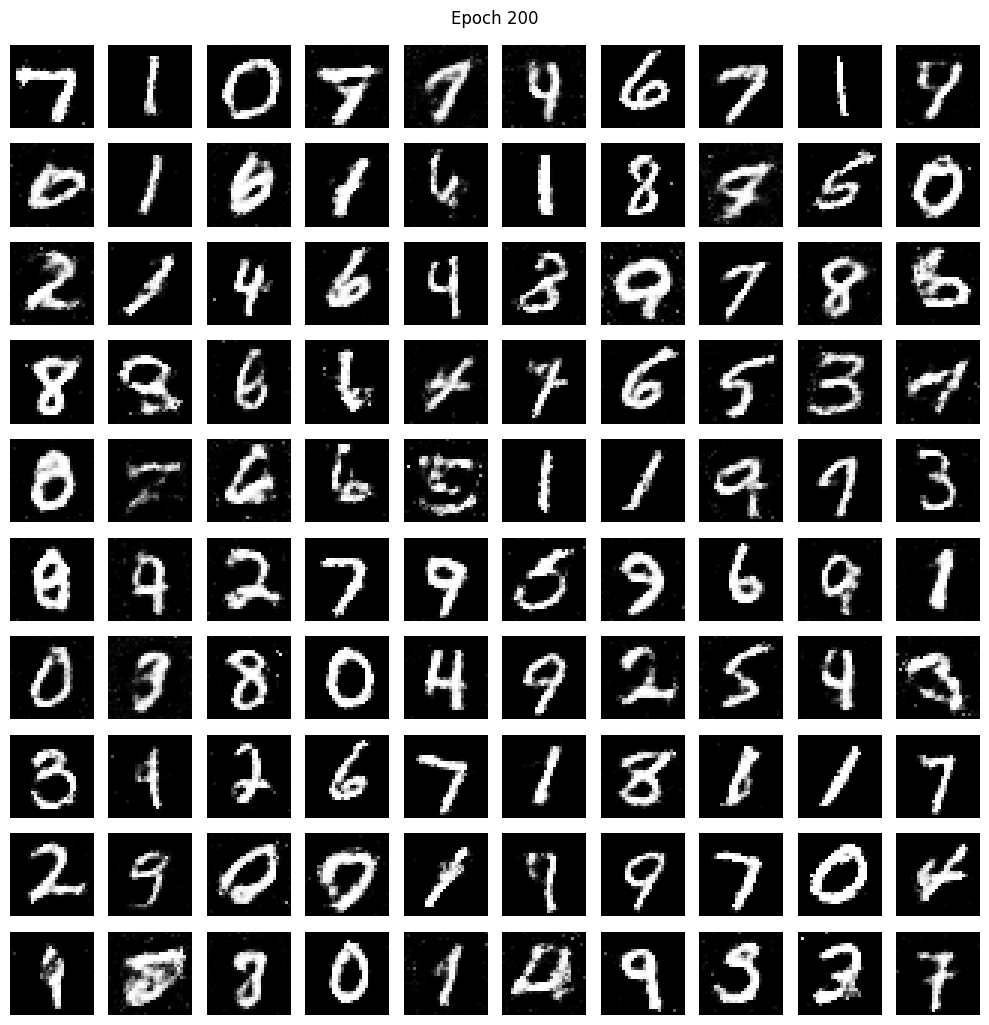

Epoch 201/400


100%|██████████| 128/128 [00:10<00:00, 12.37it/s]


Epoch 202/400


100%|██████████| 128/128 [00:11<00:00, 11.54it/s]


Epoch 203/400


100%|██████████| 128/128 [00:10<00:00, 11.90it/s]


Epoch 204/400


100%|██████████| 128/128 [00:10<00:00, 12.14it/s]


Epoch 205/400


100%|██████████| 128/128 [00:10<00:00, 11.96it/s]


Epoch 206/400


100%|██████████| 128/128 [00:12<00:00, 10.65it/s]


Epoch 207/400


100%|██████████| 128/128 [00:10<00:00, 11.69it/s]


Epoch 208/400


100%|██████████| 128/128 [00:10<00:00, 12.40it/s]


Epoch 209/400


100%|██████████| 128/128 [00:10<00:00, 12.66it/s]


Epoch 210/400


100%|██████████| 128/128 [00:10<00:00, 11.90it/s]


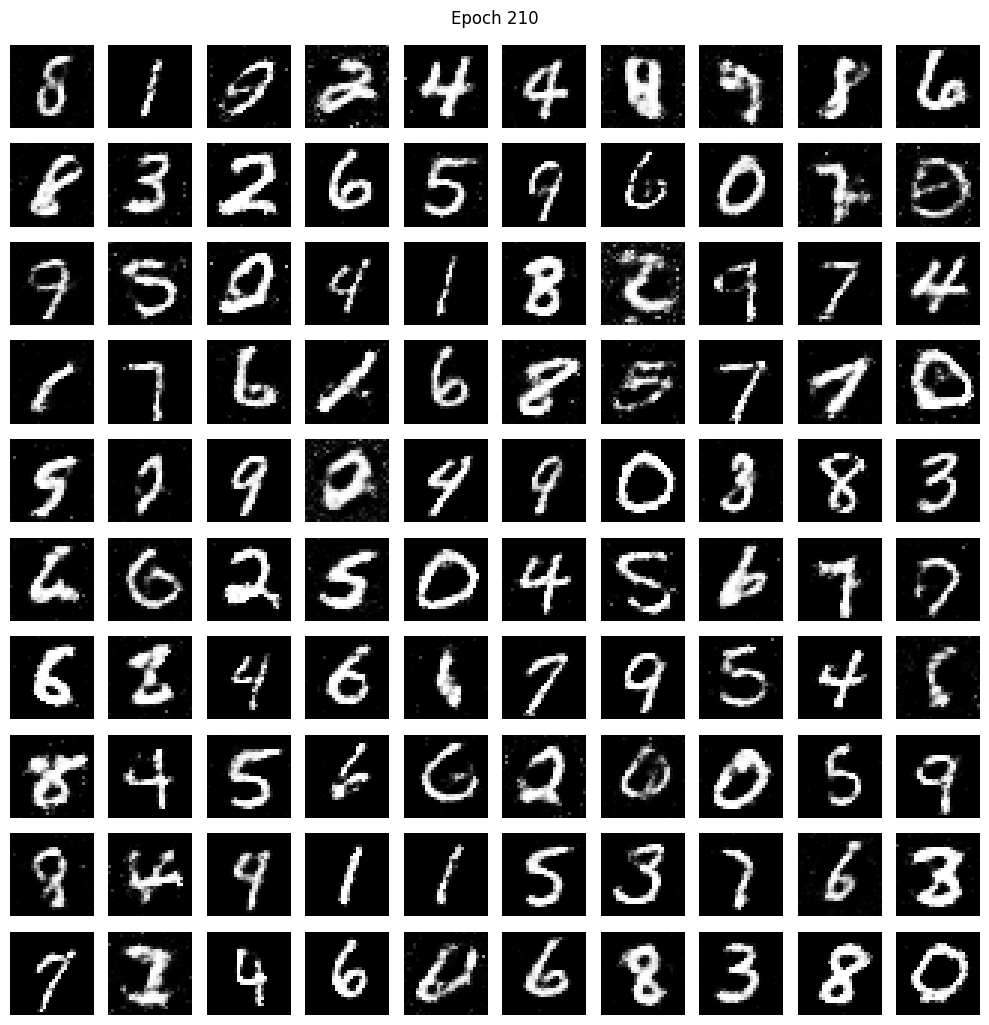

Epoch 211/400


100%|██████████| 128/128 [00:11<00:00, 11.54it/s]


Epoch 212/400


100%|██████████| 128/128 [00:11<00:00, 11.14it/s]


Epoch 213/400


100%|██████████| 128/128 [00:11<00:00, 11.56it/s]


Epoch 214/400


100%|██████████| 128/128 [00:11<00:00, 11.40it/s]


Epoch 215/400


100%|██████████| 128/128 [00:10<00:00, 11.69it/s]


Epoch 216/400


100%|██████████| 128/128 [00:10<00:00, 11.94it/s]


Epoch 217/400


100%|██████████| 128/128 [00:10<00:00, 11.77it/s]


Epoch 218/400


100%|██████████| 128/128 [00:09<00:00, 13.22it/s]


Epoch 219/400


100%|██████████| 128/128 [00:10<00:00, 11.92it/s]


Epoch 220/400


100%|██████████| 128/128 [00:10<00:00, 11.99it/s]


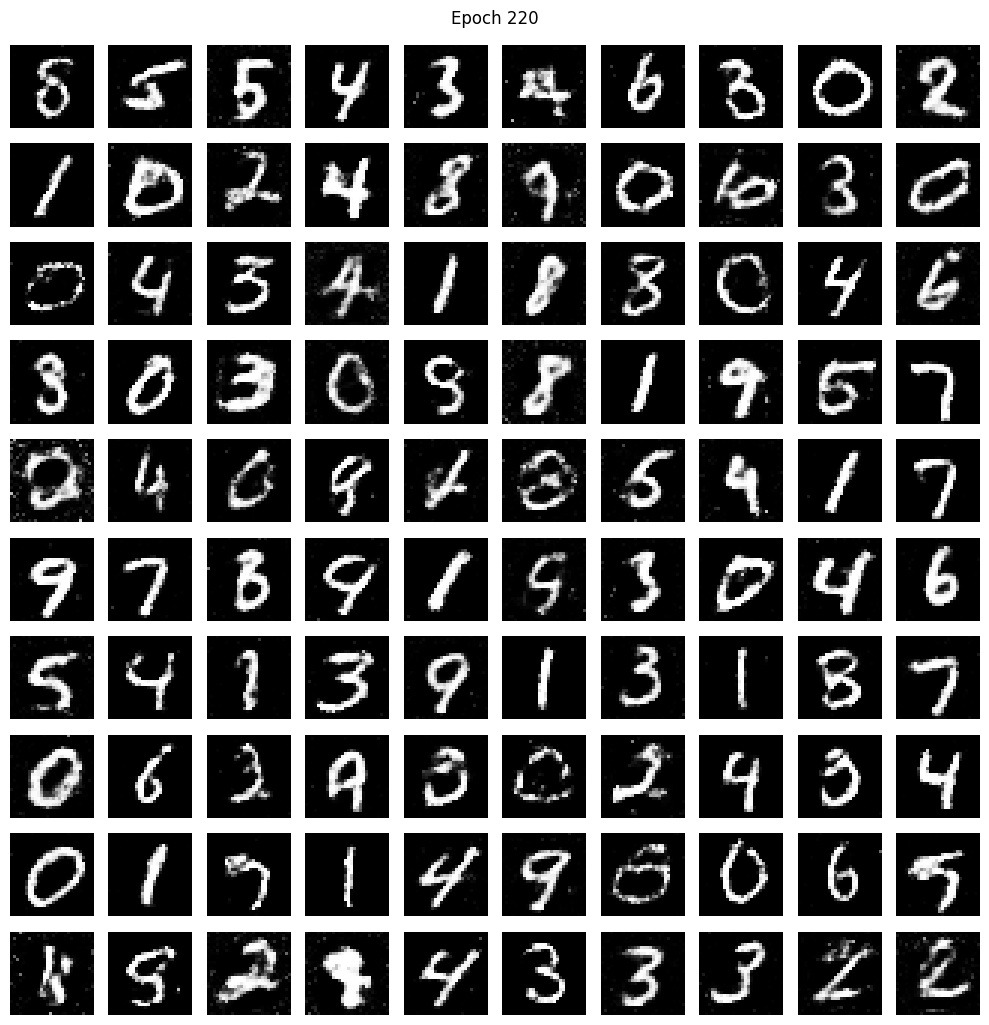

Epoch 221/400


100%|██████████| 128/128 [00:11<00:00, 11.52it/s]


Epoch 222/400


100%|██████████| 128/128 [00:11<00:00, 11.61it/s]


Epoch 223/400


100%|██████████| 128/128 [00:10<00:00, 11.88it/s]


Epoch 224/400


100%|██████████| 128/128 [00:10<00:00, 11.82it/s]


Epoch 225/400


100%|██████████| 128/128 [00:10<00:00, 11.87it/s]


Epoch 226/400


100%|██████████| 128/128 [00:10<00:00, 11.75it/s]


Epoch 227/400


100%|██████████| 128/128 [00:10<00:00, 12.52it/s]


Epoch 228/400


100%|██████████| 128/128 [00:10<00:00, 12.01it/s]


Epoch 229/400


100%|██████████| 128/128 [00:10<00:00, 11.89it/s]


Epoch 230/400


100%|██████████| 128/128 [00:11<00:00, 11.46it/s]


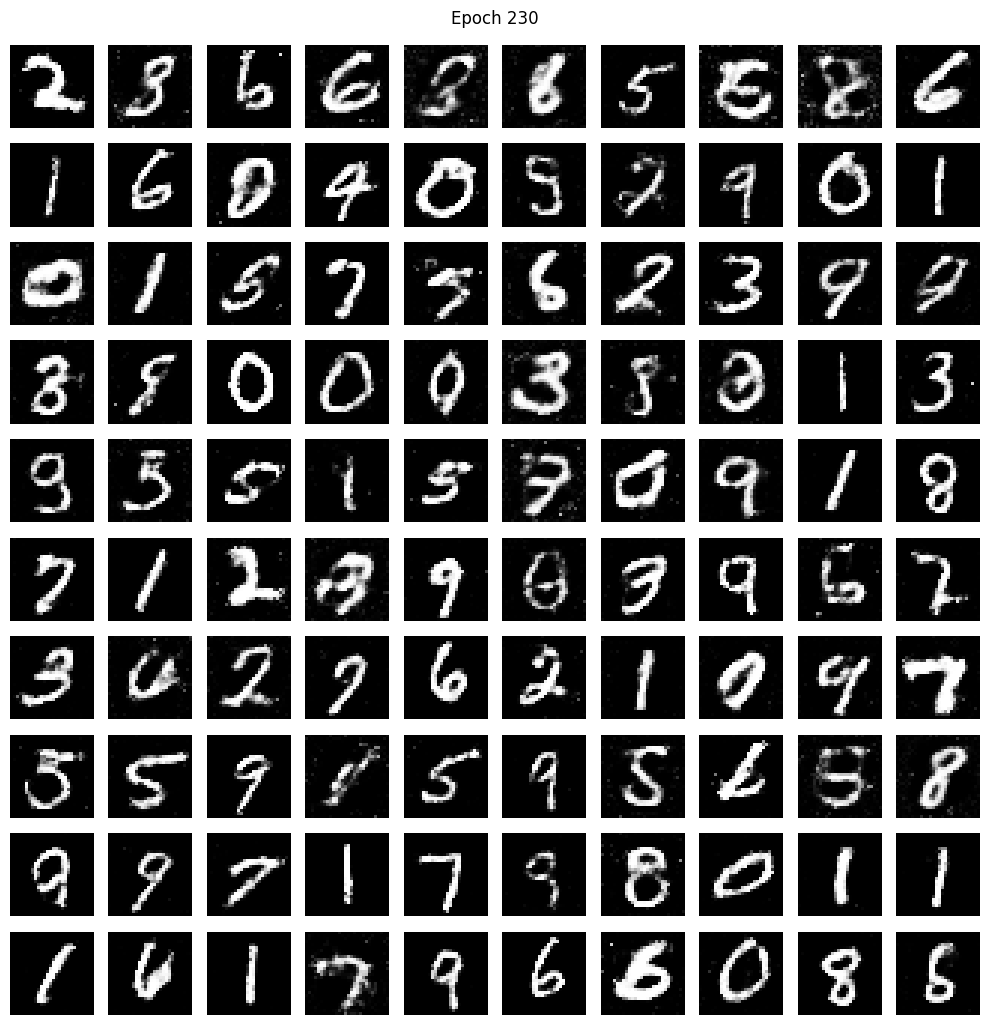

Epoch 231/400


100%|██████████| 128/128 [00:11<00:00, 10.85it/s]


Epoch 232/400


100%|██████████| 128/128 [00:10<00:00, 11.77it/s]


Epoch 233/400


100%|██████████| 128/128 [00:11<00:00, 11.38it/s]


Epoch 234/400


100%|██████████| 128/128 [00:11<00:00, 11.37it/s]


Epoch 235/400


100%|██████████| 128/128 [00:10<00:00, 11.83it/s]


Epoch 236/400


100%|██████████| 128/128 [00:10<00:00, 12.73it/s]


Epoch 237/400


100%|██████████| 128/128 [00:11<00:00, 11.47it/s]


Epoch 238/400


100%|██████████| 128/128 [00:11<00:00, 11.51it/s]


Epoch 239/400


100%|██████████| 128/128 [00:10<00:00, 11.65it/s]


Epoch 240/400


100%|██████████| 128/128 [00:10<00:00, 11.94it/s]


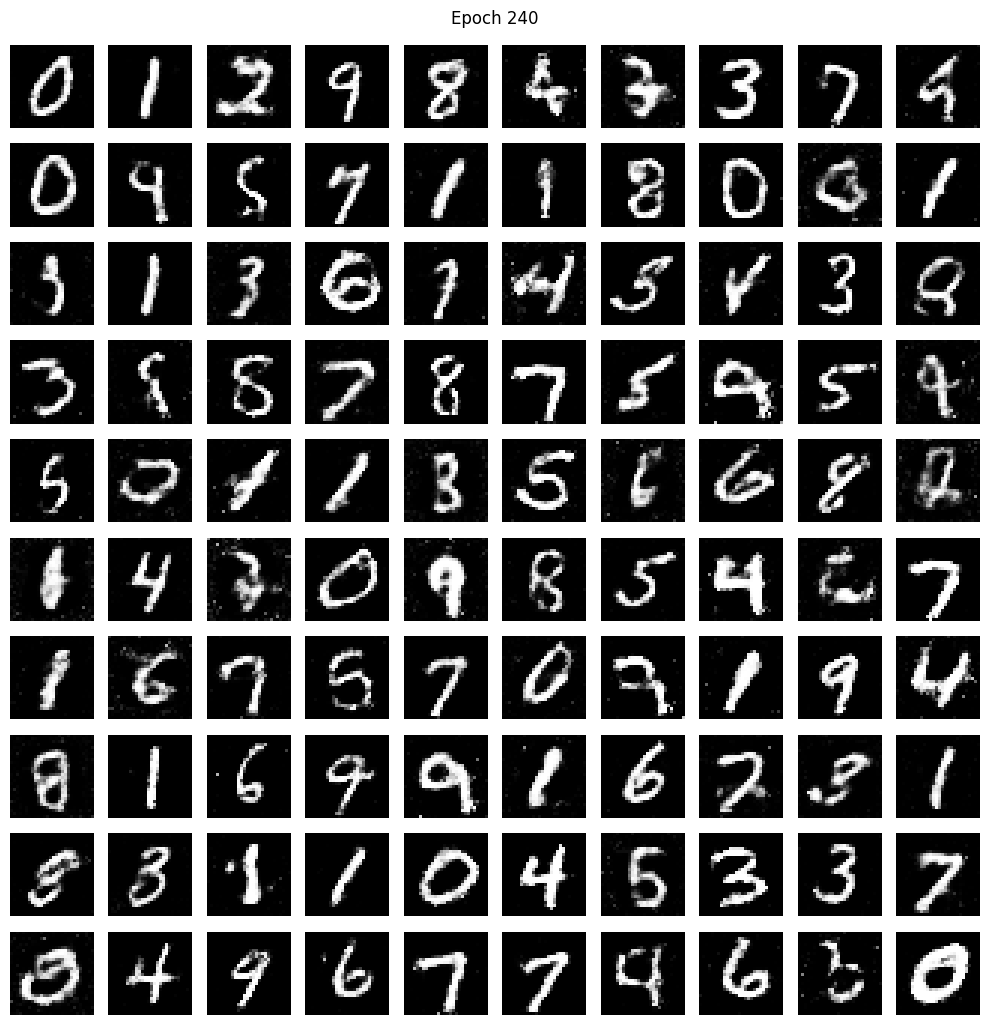

Epoch 241/400


100%|██████████| 128/128 [00:11<00:00, 11.34it/s]


Epoch 242/400


100%|██████████| 128/128 [00:11<00:00, 11.28it/s]


Epoch 243/400


100%|██████████| 128/128 [00:11<00:00, 11.46it/s]


Epoch 244/400


100%|██████████| 128/128 [00:11<00:00, 11.08it/s]


Epoch 245/400


100%|██████████| 128/128 [00:11<00:00, 11.05it/s]


Epoch 246/400


100%|██████████| 128/128 [00:10<00:00, 11.81it/s]


Epoch 247/400


100%|██████████| 128/128 [00:10<00:00, 11.94it/s]


Epoch 248/400


100%|██████████| 128/128 [00:10<00:00, 11.66it/s]


Epoch 249/400


100%|██████████| 128/128 [00:11<00:00, 11.60it/s]


Epoch 250/400


100%|██████████| 128/128 [00:11<00:00, 11.33it/s]


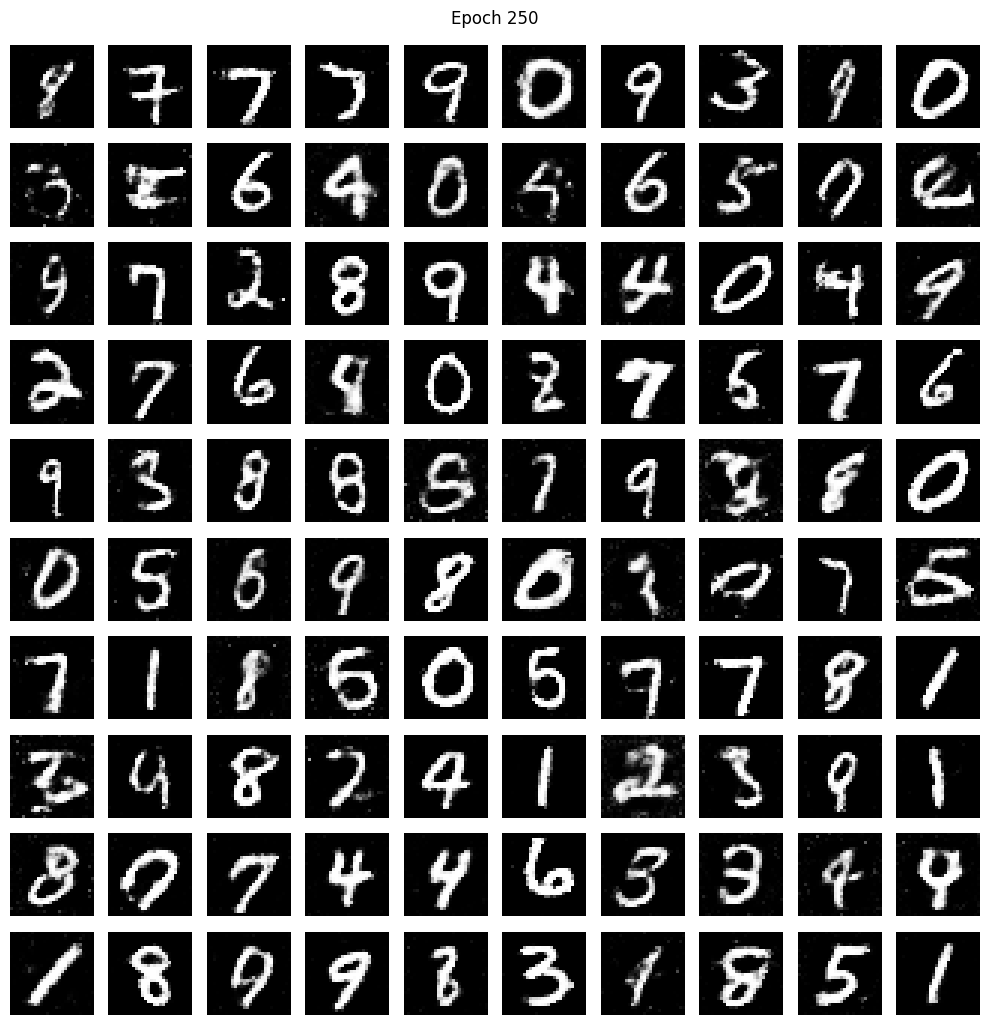

Epoch 251/400


100%|██████████| 128/128 [00:11<00:00, 11.09it/s]


Epoch 252/400


100%|██████████| 128/128 [00:11<00:00, 11.40it/s]


Epoch 253/400


100%|██████████| 128/128 [00:11<00:00, 10.99it/s]


Epoch 254/400


100%|██████████| 128/128 [00:11<00:00, 11.24it/s]


Epoch 255/400


100%|██████████| 128/128 [00:11<00:00, 11.27it/s]


Epoch 256/400


100%|██████████| 128/128 [00:12<00:00, 10.23it/s]


Epoch 257/400


100%|██████████| 128/128 [00:11<00:00, 11.47it/s]


Epoch 258/400


100%|██████████| 128/128 [00:10<00:00, 11.68it/s]


Epoch 259/400


100%|██████████| 128/128 [00:10<00:00, 11.81it/s]


Epoch 260/400


100%|██████████| 128/128 [00:11<00:00, 11.31it/s]


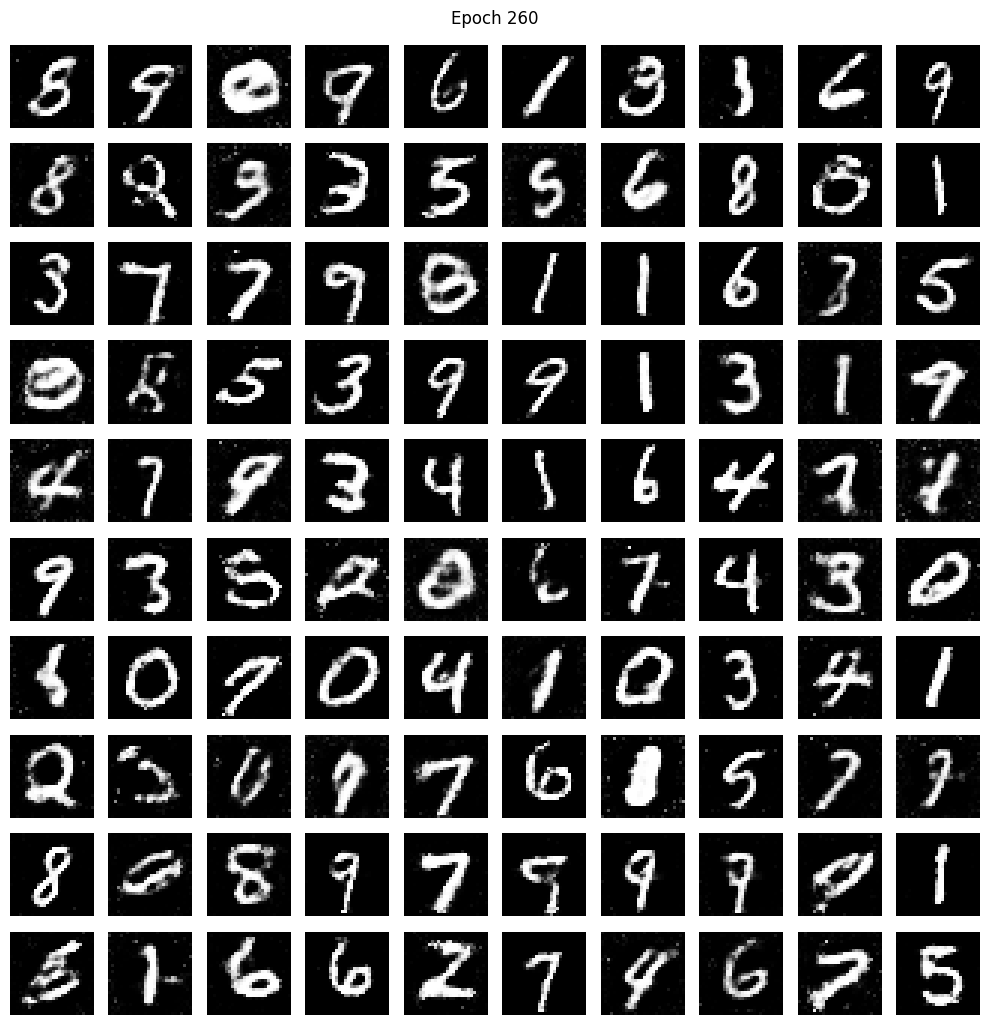

Epoch 261/400


100%|██████████| 128/128 [00:11<00:00, 10.99it/s]


Epoch 262/400


100%|██████████| 128/128 [00:11<00:00, 11.33it/s]


Epoch 263/400


100%|██████████| 128/128 [00:11<00:00, 11.52it/s]


Epoch 264/400


100%|██████████| 128/128 [00:11<00:00, 11.56it/s]


Epoch 265/400


100%|██████████| 128/128 [00:11<00:00, 11.52it/s]


Epoch 266/400


100%|██████████| 128/128 [00:10<00:00, 11.67it/s]


Epoch 267/400


100%|██████████| 128/128 [00:11<00:00, 11.59it/s]


Epoch 268/400


100%|██████████| 128/128 [00:10<00:00, 12.28it/s]


Epoch 269/400


100%|██████████| 128/128 [00:10<00:00, 12.30it/s]


Epoch 270/400


100%|██████████| 128/128 [00:11<00:00, 11.47it/s]


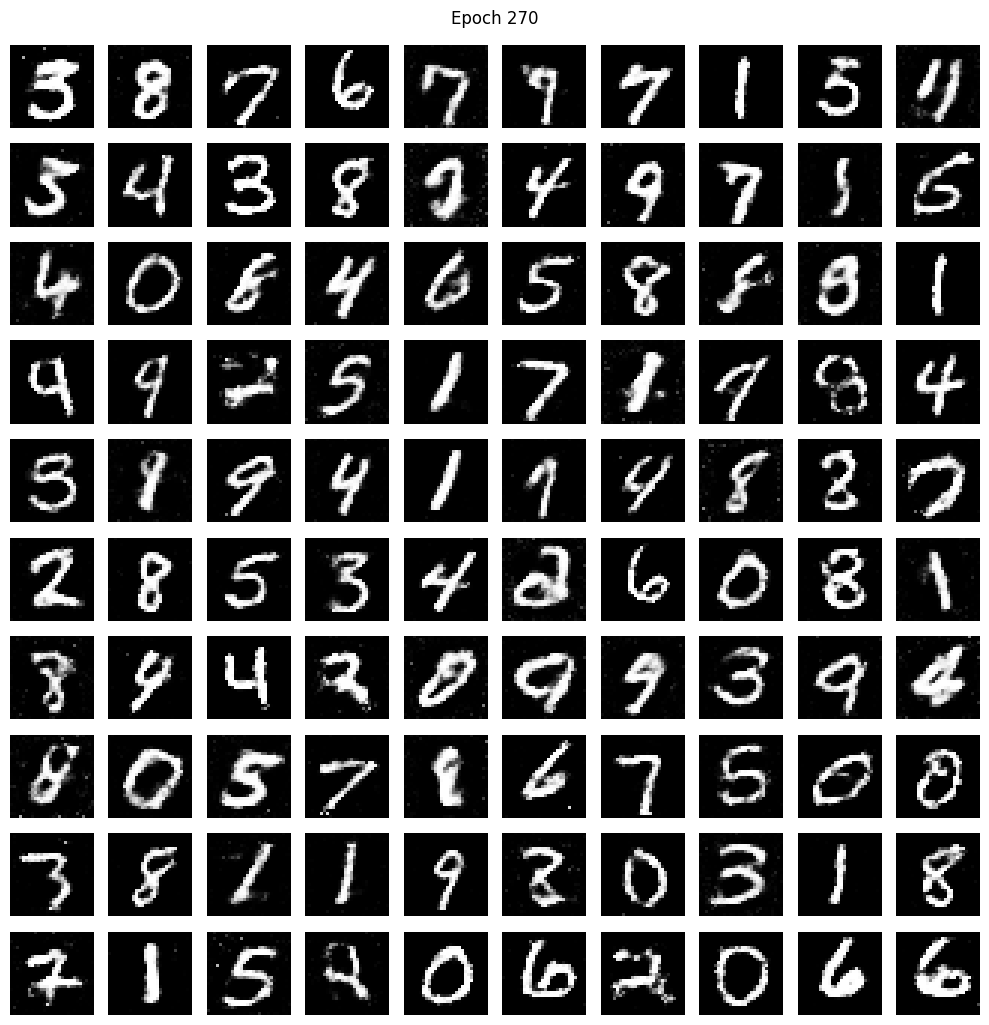

Epoch 271/400


100%|██████████| 128/128 [00:11<00:00, 11.34it/s]


Epoch 272/400


100%|██████████| 128/128 [00:11<00:00, 11.03it/s]


Epoch 273/400


100%|██████████| 128/128 [00:11<00:00, 11.21it/s]


Epoch 274/400


100%|██████████| 128/128 [00:11<00:00, 11.04it/s]


Epoch 275/400


100%|██████████| 128/128 [00:11<00:00, 11.41it/s]


Epoch 276/400


100%|██████████| 128/128 [00:11<00:00, 11.36it/s]


Epoch 277/400


100%|██████████| 128/128 [00:11<00:00, 11.52it/s]


Epoch 278/400


100%|██████████| 128/128 [00:11<00:00, 11.61it/s]


Epoch 279/400


100%|██████████| 128/128 [00:10<00:00, 12.66it/s]


Epoch 280/400


100%|██████████| 128/128 [00:11<00:00, 11.54it/s]


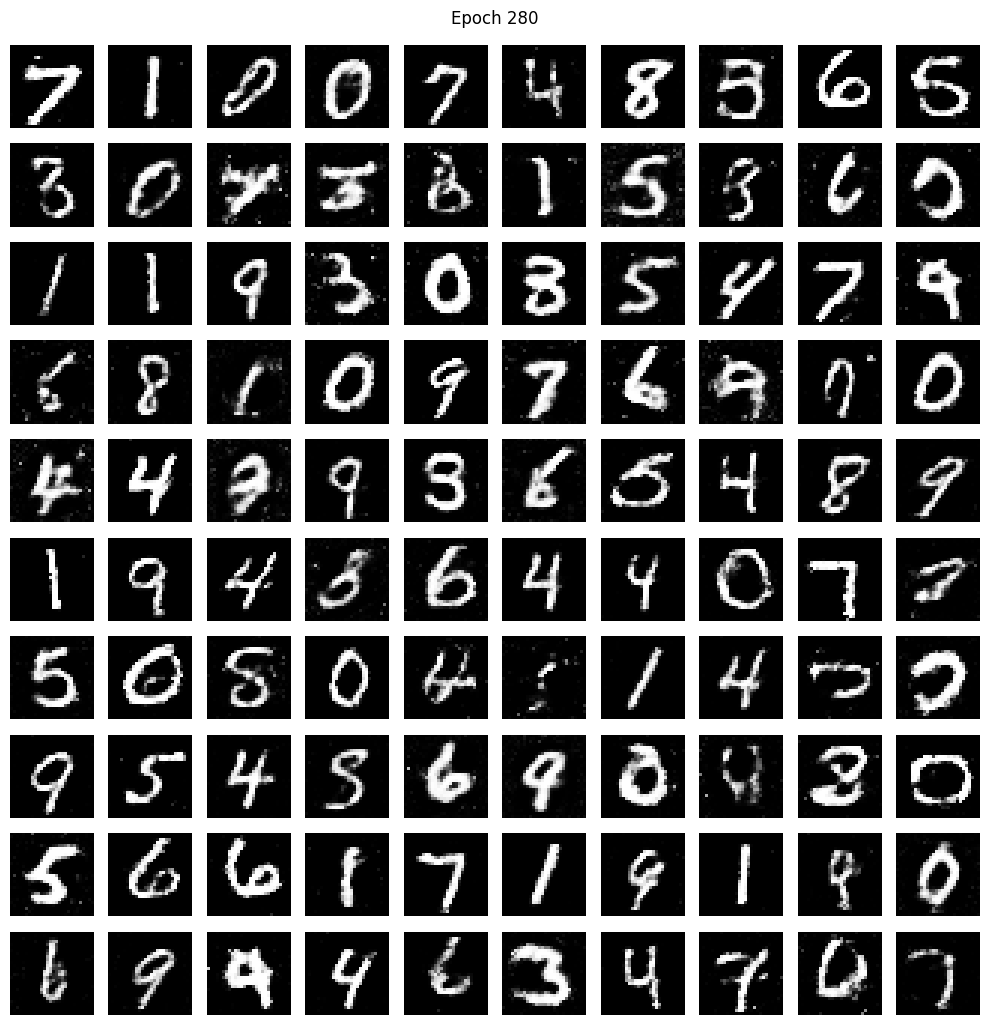

Epoch 281/400


100%|██████████| 128/128 [00:11<00:00, 10.99it/s]


Epoch 282/400


100%|██████████| 128/128 [00:11<00:00, 11.30it/s]


Epoch 283/400


100%|██████████| 128/128 [00:11<00:00, 11.41it/s]


Epoch 284/400


100%|██████████| 128/128 [00:11<00:00, 11.56it/s]


Epoch 285/400


100%|██████████| 128/128 [00:11<00:00, 11.40it/s]


Epoch 286/400


100%|██████████| 128/128 [00:11<00:00, 11.49it/s]


Epoch 287/400


100%|██████████| 128/128 [00:10<00:00, 11.66it/s]


Epoch 288/400


100%|██████████| 128/128 [00:10<00:00, 12.00it/s]


Epoch 289/400


100%|██████████| 128/128 [00:10<00:00, 12.08it/s]


Epoch 290/400


100%|██████████| 128/128 [00:11<00:00, 11.20it/s]


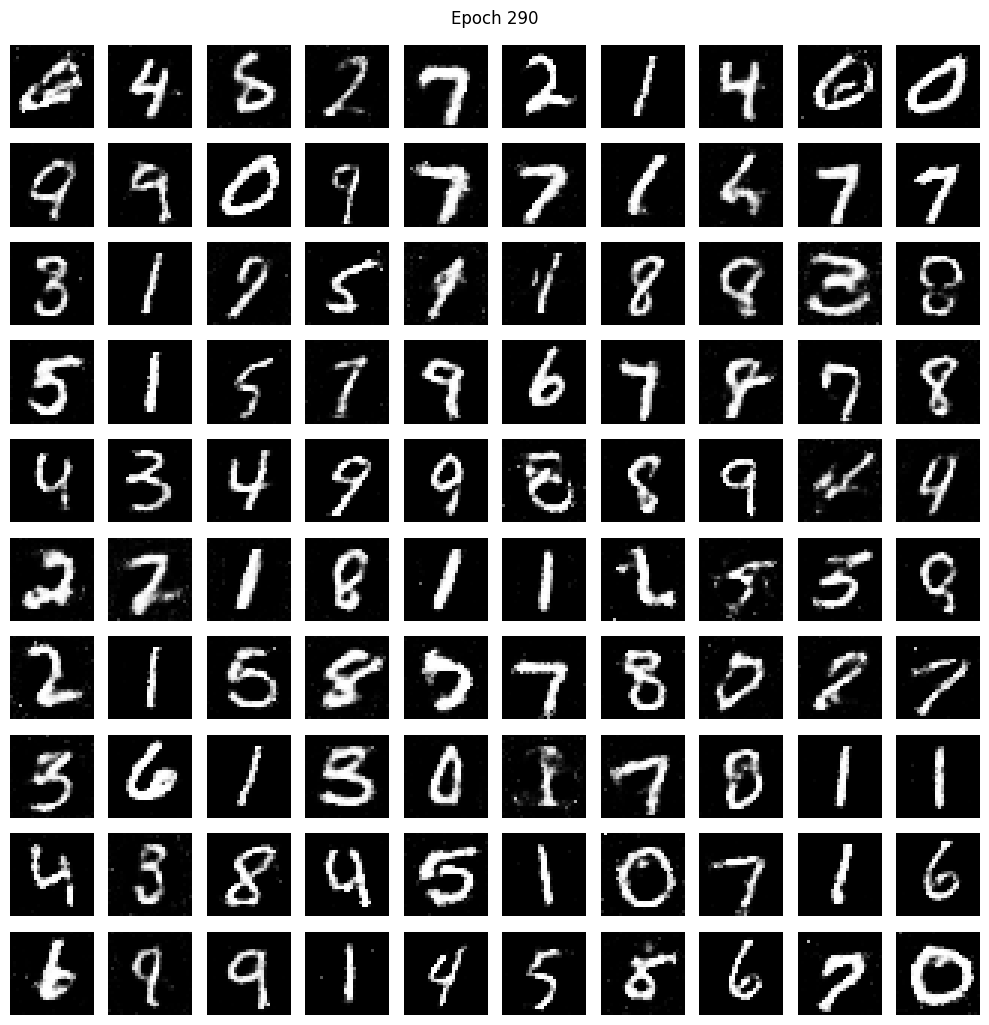

Epoch 291/400


100%|██████████| 128/128 [00:11<00:00, 11.28it/s]


Epoch 292/400


100%|██████████| 128/128 [00:11<00:00, 11.32it/s]


Epoch 293/400


100%|██████████| 128/128 [00:11<00:00, 11.37it/s]


Epoch 294/400


100%|██████████| 128/128 [00:11<00:00, 11.45it/s]


Epoch 295/400


100%|██████████| 128/128 [00:11<00:00, 11.50it/s]


Epoch 296/400


100%|██████████| 128/128 [00:11<00:00, 11.44it/s]


Epoch 297/400


100%|██████████| 128/128 [00:11<00:00, 11.47it/s]


Epoch 298/400


100%|██████████| 128/128 [00:10<00:00, 12.51it/s]


Epoch 299/400


100%|██████████| 128/128 [00:11<00:00, 11.57it/s]


Epoch 300/400


100%|██████████| 128/128 [00:11<00:00, 11.58it/s]


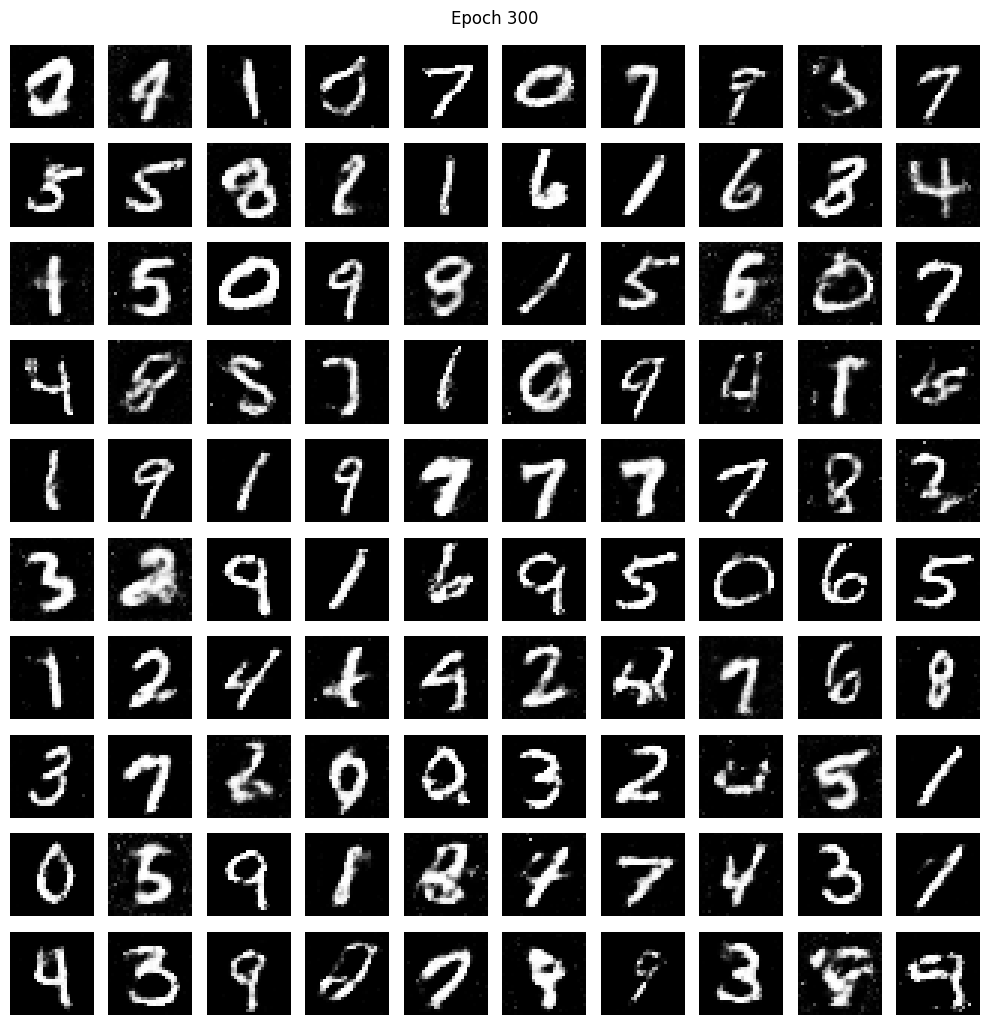

Epoch 301/400


100%|██████████| 128/128 [00:11<00:00, 11.09it/s]


Epoch 302/400


100%|██████████| 128/128 [00:11<00:00, 11.26it/s]


Epoch 303/400


100%|██████████| 128/128 [00:11<00:00, 10.96it/s]


Epoch 304/400


100%|██████████| 128/128 [00:12<00:00, 10.24it/s]


Epoch 305/400


100%|██████████| 128/128 [00:11<00:00, 11.22it/s]


Epoch 306/400


100%|██████████| 128/128 [00:11<00:00, 11.39it/s]


Epoch 307/400


100%|██████████| 128/128 [00:11<00:00, 11.39it/s]


Epoch 308/400


100%|██████████| 128/128 [00:11<00:00, 11.42it/s]


Epoch 309/400


100%|██████████| 128/128 [00:11<00:00, 11.22it/s]


Epoch 310/400


100%|██████████| 128/128 [00:10<00:00, 12.02it/s]


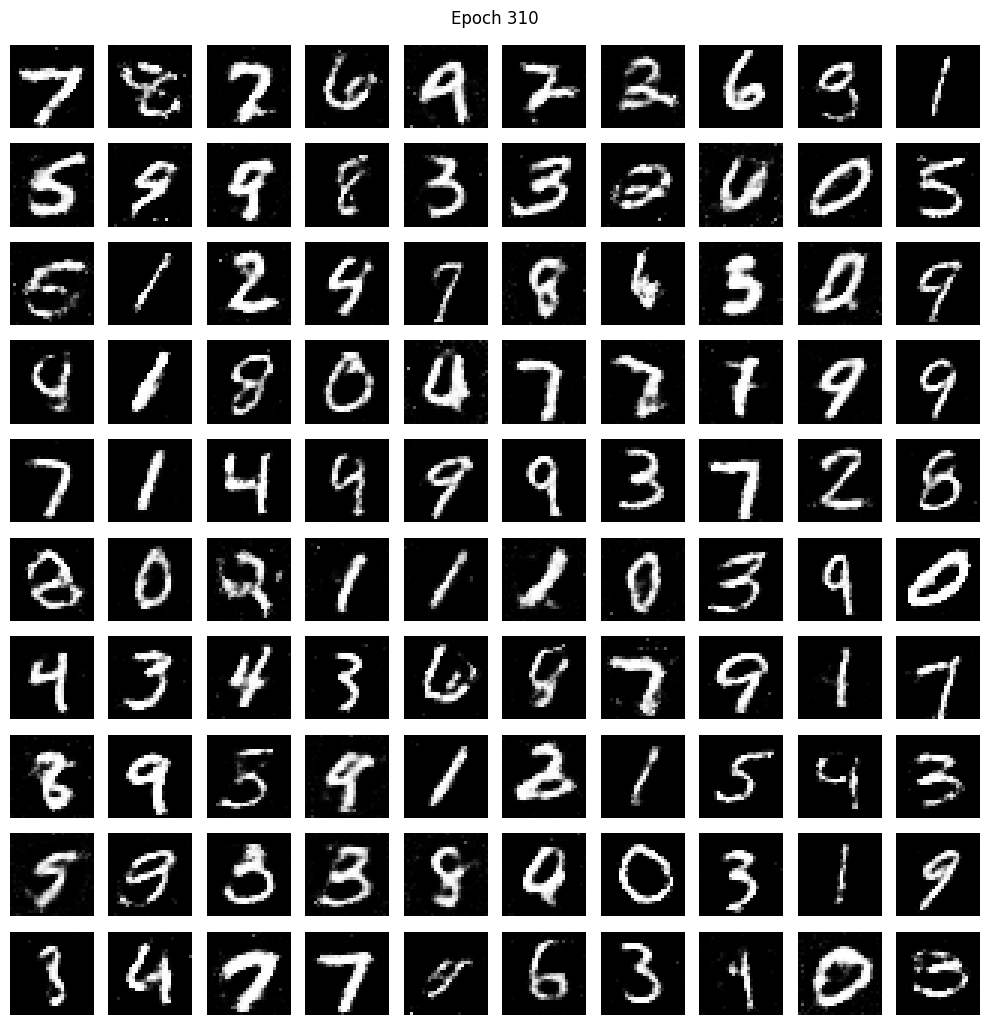

Epoch 311/400


100%|██████████| 128/128 [00:11<00:00, 11.43it/s]


Epoch 312/400


100%|██████████| 128/128 [00:10<00:00, 11.70it/s]


Epoch 313/400


100%|██████████| 128/128 [00:11<00:00, 10.75it/s]


Epoch 314/400


100%|██████████| 128/128 [00:11<00:00, 10.99it/s]


Epoch 315/400


100%|██████████| 128/128 [00:11<00:00, 10.78it/s]


Epoch 316/400


100%|██████████| 128/128 [00:11<00:00, 10.90it/s]


Epoch 317/400


100%|██████████| 128/128 [00:11<00:00, 11.23it/s]


Epoch 318/400


100%|██████████| 128/128 [00:11<00:00, 11.36it/s]


Epoch 319/400


100%|██████████| 128/128 [00:11<00:00, 11.21it/s]


Epoch 320/400


100%|██████████| 128/128 [00:11<00:00, 11.22it/s]


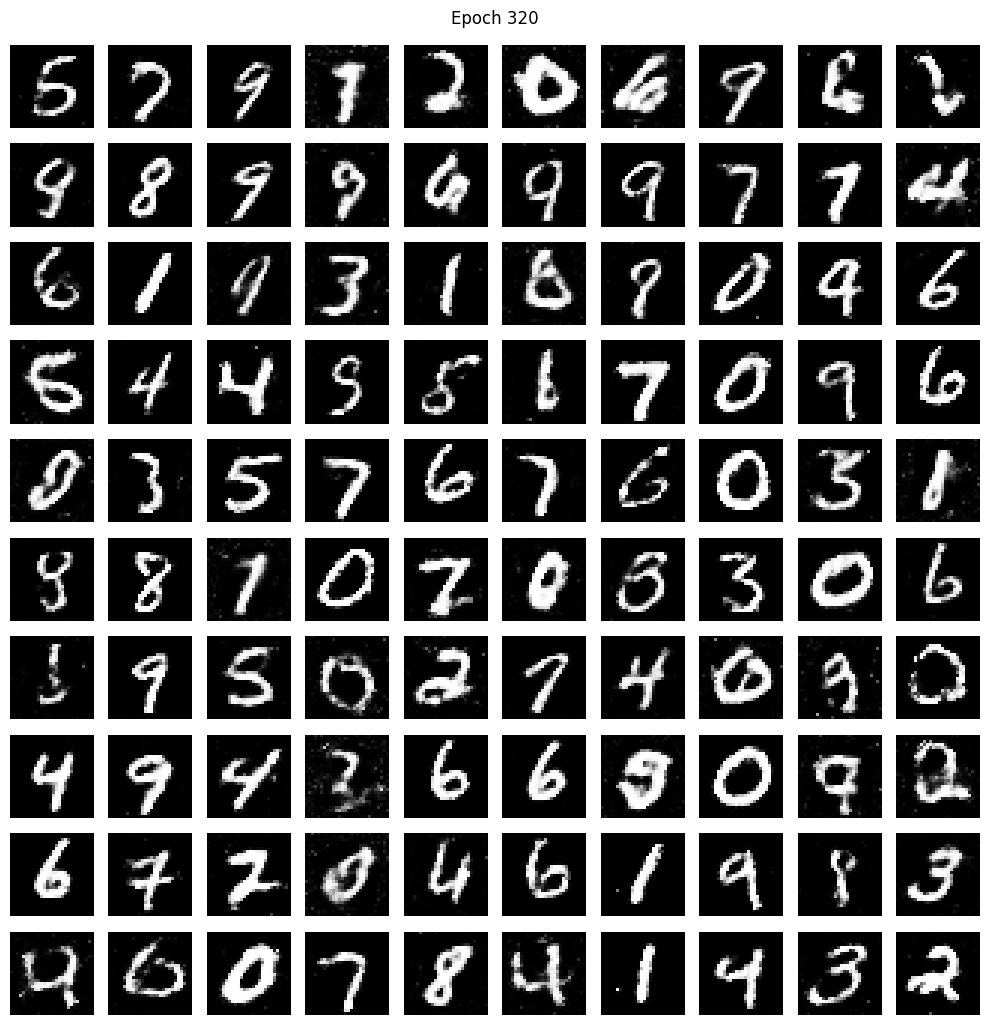

Epoch 321/400


100%|██████████| 128/128 [00:11<00:00, 10.96it/s]


Epoch 322/400


100%|██████████| 128/128 [00:11<00:00, 10.97it/s]


Epoch 323/400


100%|██████████| 128/128 [00:11<00:00, 11.21it/s]


Epoch 324/400


100%|██████████| 128/128 [00:10<00:00, 12.02it/s]


Epoch 325/400


100%|██████████| 128/128 [00:11<00:00, 11.55it/s]


Epoch 326/400


100%|██████████| 128/128 [00:11<00:00, 11.19it/s]


Epoch 327/400


100%|██████████| 128/128 [00:11<00:00, 11.28it/s]


Epoch 328/400


100%|██████████| 128/128 [00:12<00:00, 10.34it/s]


Epoch 329/400


100%|██████████| 128/128 [00:11<00:00, 11.46it/s]


Epoch 330/400


100%|██████████| 128/128 [00:11<00:00, 11.38it/s]


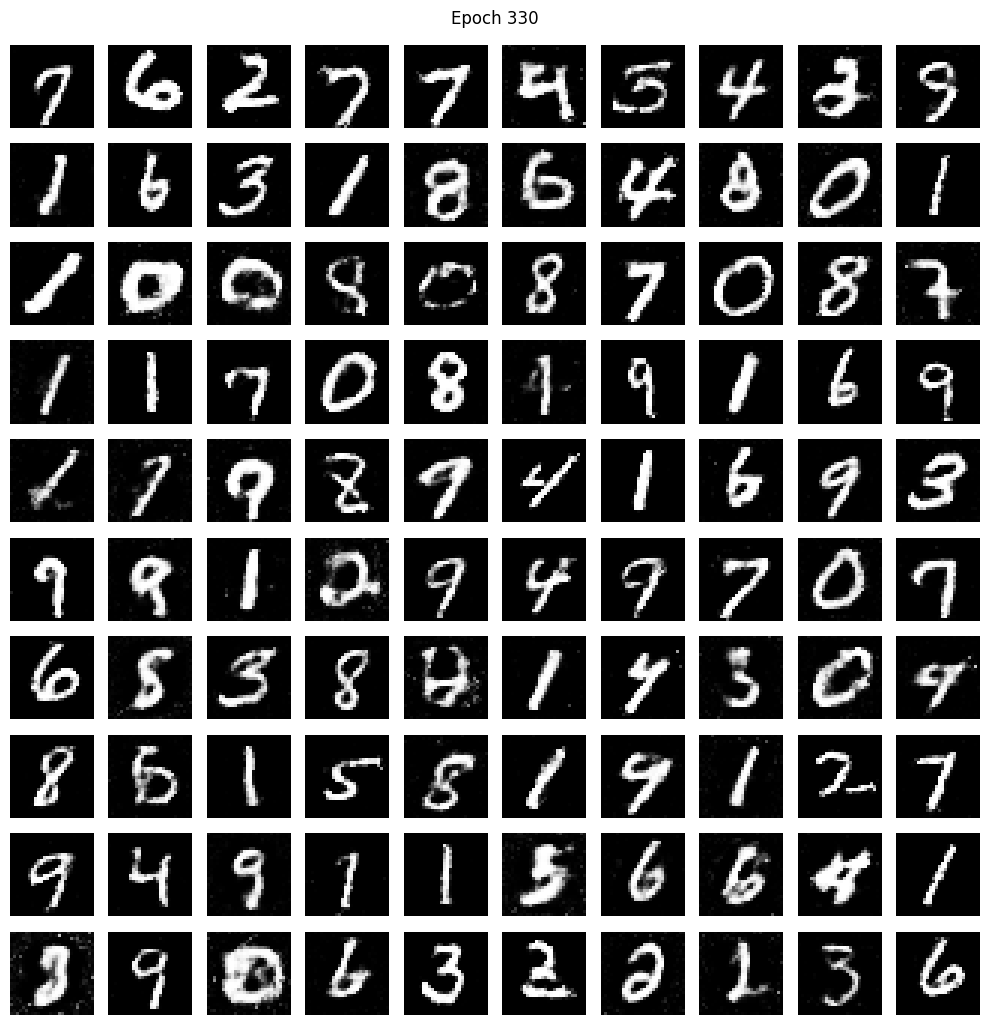

Epoch 331/400


100%|██████████| 128/128 [00:11<00:00, 11.19it/s]


Epoch 332/400


100%|██████████| 128/128 [00:12<00:00, 10.58it/s]


Epoch 333/400


100%|██████████| 128/128 [00:11<00:00, 10.82it/s]


Epoch 334/400


100%|██████████| 128/128 [00:11<00:00, 10.96it/s]


Epoch 335/400


100%|██████████| 128/128 [00:10<00:00, 11.71it/s]


Epoch 336/400


100%|██████████| 128/128 [00:10<00:00, 11.66it/s]


Epoch 337/400


100%|██████████| 128/128 [00:11<00:00, 11.05it/s]


Epoch 338/400


100%|██████████| 128/128 [00:11<00:00, 11.17it/s]


Epoch 339/400


100%|██████████| 128/128 [00:11<00:00, 11.34it/s]


Epoch 340/400


100%|██████████| 128/128 [00:11<00:00, 11.37it/s]


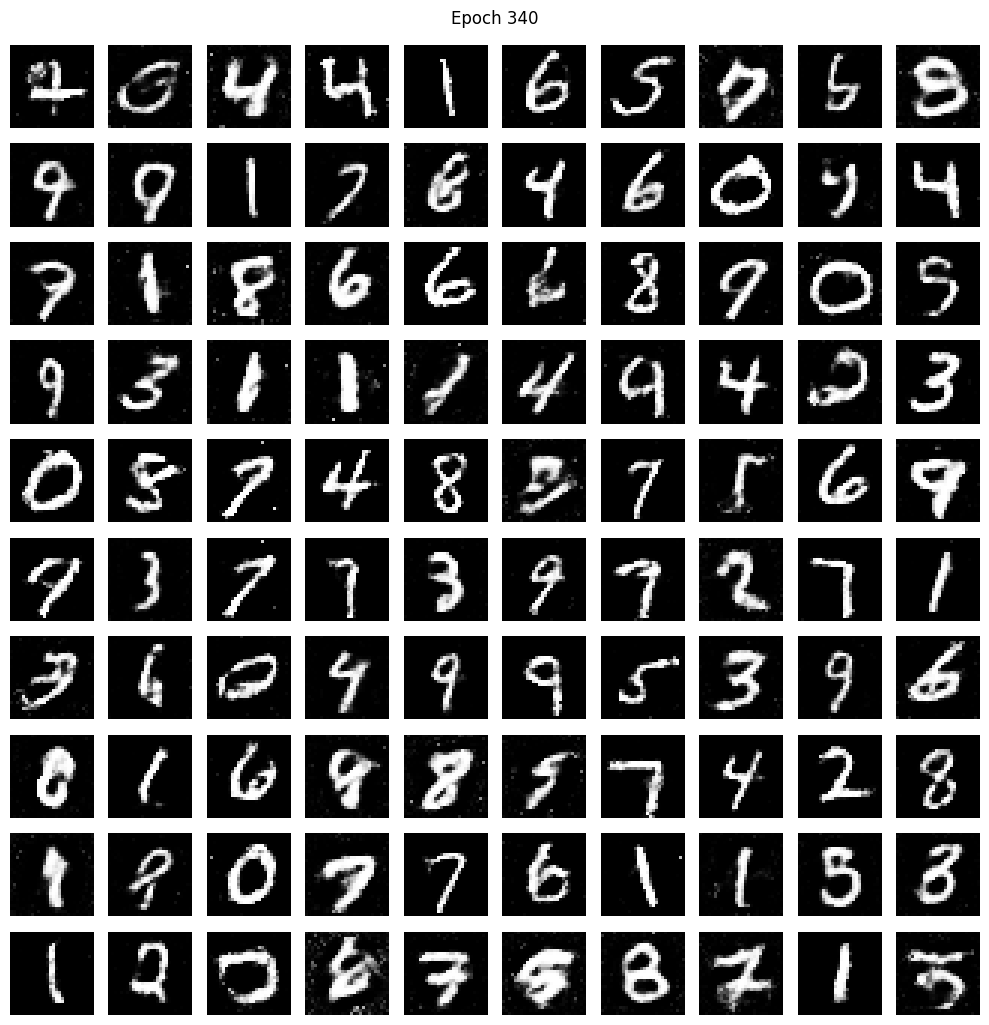

Epoch 341/400


100%|██████████| 128/128 [00:11<00:00, 11.03it/s]


Epoch 342/400


100%|██████████| 128/128 [00:11<00:00, 10.91it/s]


Epoch 343/400


100%|██████████| 128/128 [00:11<00:00, 10.88it/s]


Epoch 344/400


100%|██████████| 128/128 [00:11<00:00, 10.99it/s]


Epoch 345/400


100%|██████████| 128/128 [00:11<00:00, 11.19it/s]


Epoch 346/400


100%|██████████| 128/128 [00:11<00:00, 11.40it/s]


Epoch 347/400


100%|██████████| 128/128 [00:10<00:00, 12.41it/s]


Epoch 348/400


100%|██████████| 128/128 [00:11<00:00, 11.16it/s]


Epoch 349/400


100%|██████████| 128/128 [00:11<00:00, 11.10it/s]


Epoch 350/400


100%|██████████| 128/128 [00:11<00:00, 11.00it/s]


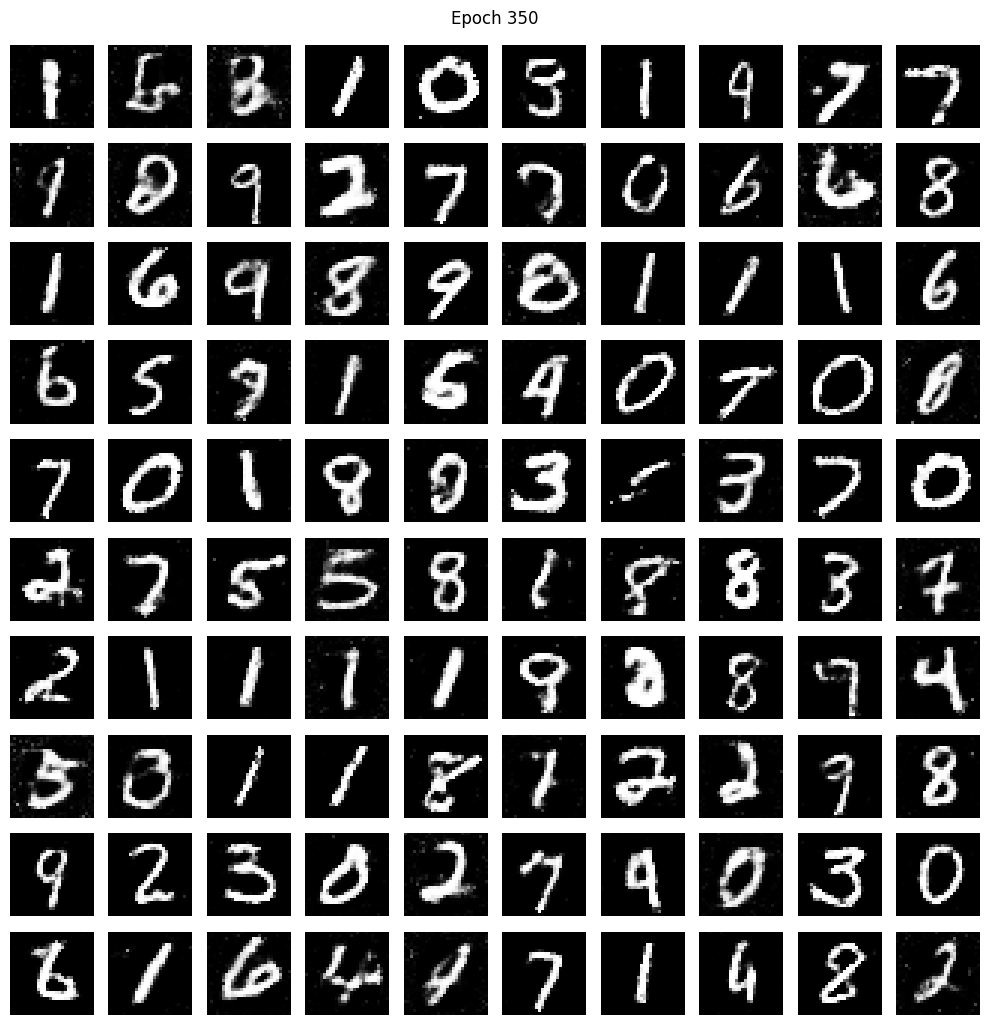

Epoch 351/400


100%|██████████| 128/128 [00:12<00:00,  9.89it/s]


Epoch 352/400


100%|██████████| 128/128 [00:11<00:00, 11.17it/s]


Epoch 353/400


100%|██████████| 128/128 [00:11<00:00, 11.04it/s]


Epoch 354/400


100%|██████████| 128/128 [00:11<00:00, 11.22it/s]


Epoch 355/400


100%|██████████| 128/128 [00:11<00:00, 11.13it/s]


Epoch 356/400


100%|██████████| 128/128 [00:11<00:00, 10.91it/s]


Epoch 357/400


100%|██████████| 128/128 [00:11<00:00, 11.15it/s]


Epoch 358/400


100%|██████████| 128/128 [00:10<00:00, 11.89it/s]


Epoch 359/400


100%|██████████| 128/128 [00:11<00:00, 11.60it/s]


Epoch 360/400


100%|██████████| 128/128 [00:11<00:00, 11.17it/s]


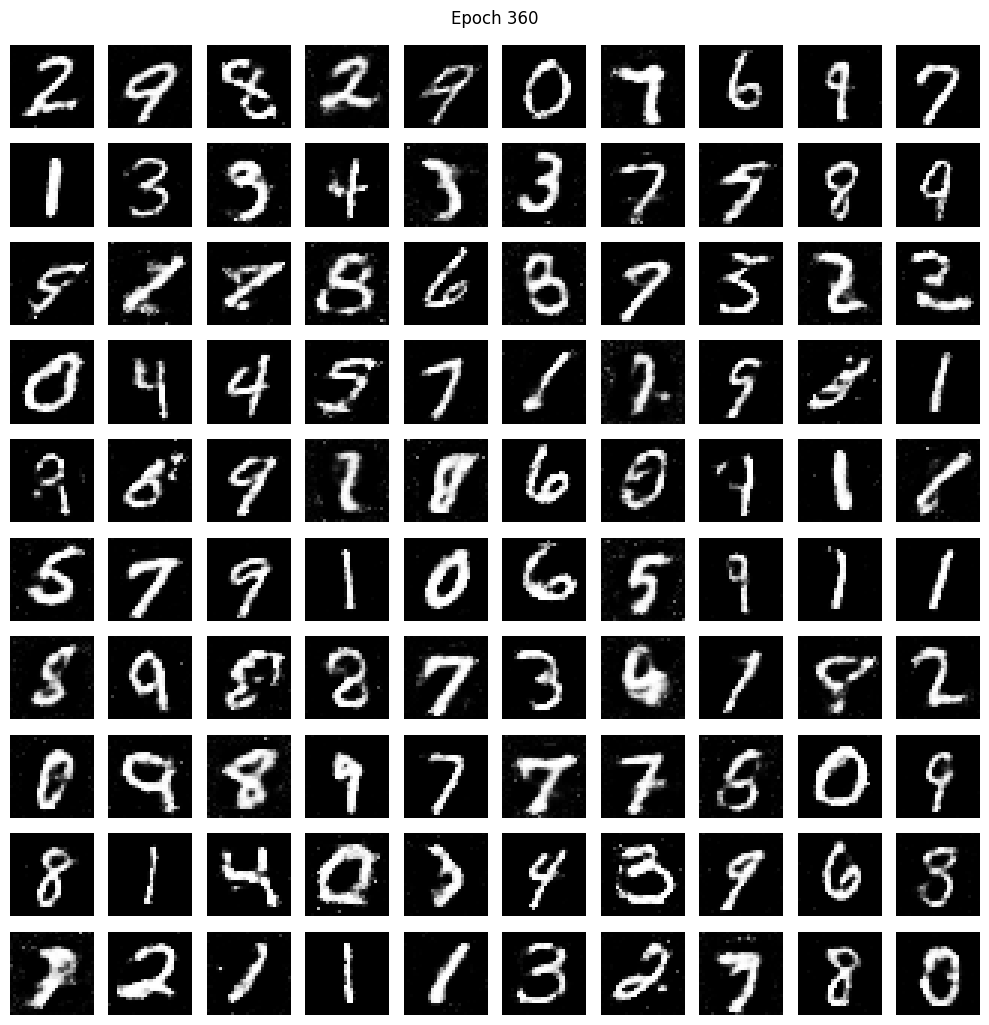

Epoch 361/400


100%|██████████| 128/128 [00:12<00:00, 10.49it/s]


Epoch 362/400


100%|██████████| 128/128 [00:12<00:00, 10.58it/s]


Epoch 363/400


100%|██████████| 128/128 [00:11<00:00, 10.86it/s]


Epoch 364/400


100%|██████████| 128/128 [00:11<00:00, 10.83it/s]


Epoch 365/400


100%|██████████| 128/128 [00:11<00:00, 10.96it/s]


Epoch 366/400


100%|██████████| 128/128 [00:11<00:00, 10.75it/s]


Epoch 367/400


100%|██████████| 128/128 [00:11<00:00, 11.14it/s]


Epoch 368/400


100%|██████████| 128/128 [00:11<00:00, 11.08it/s]


Epoch 369/400


100%|██████████| 128/128 [00:11<00:00, 10.95it/s]


Epoch 370/400


100%|██████████| 128/128 [00:11<00:00, 11.25it/s]


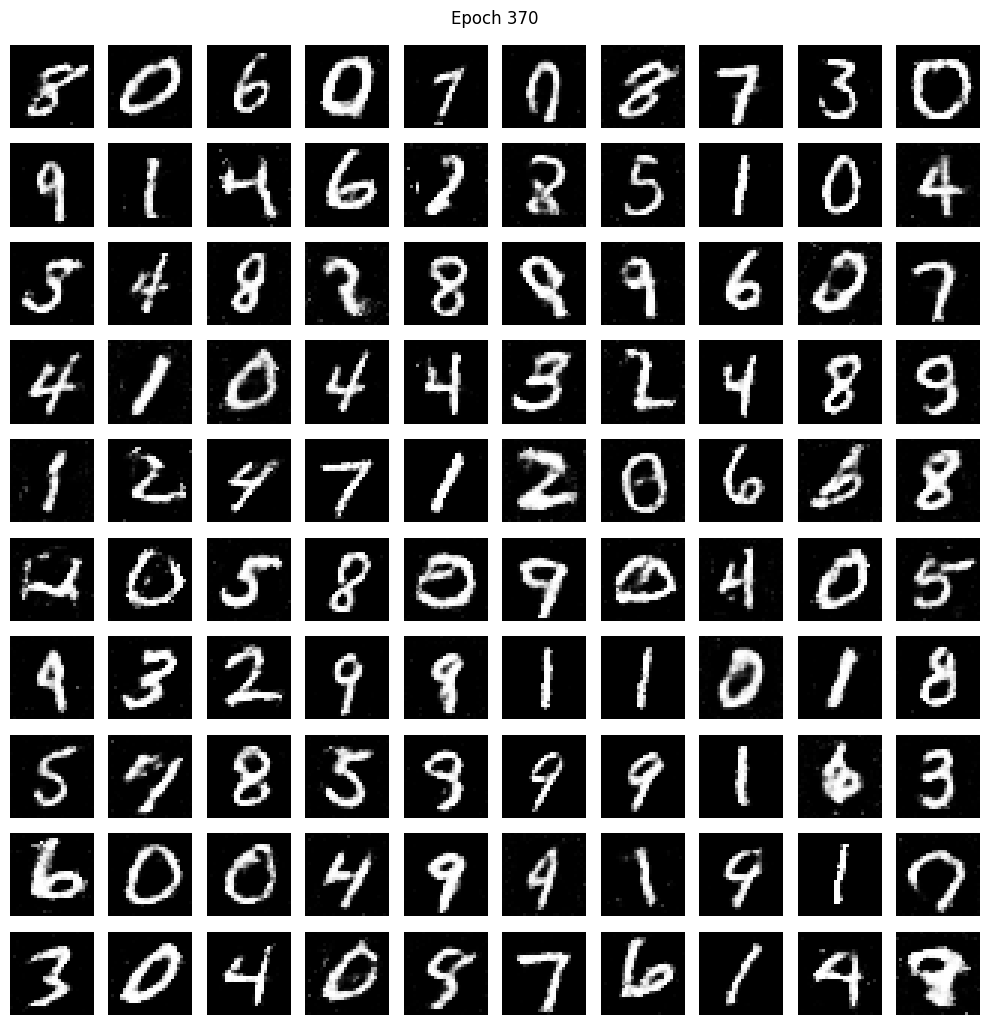

Epoch 371/400


100%|██████████| 128/128 [00:12<00:00, 10.64it/s]


Epoch 372/400


100%|██████████| 128/128 [00:11<00:00, 10.82it/s]


Epoch 373/400


100%|██████████| 128/128 [00:11<00:00, 10.99it/s]


Epoch 374/400


100%|██████████| 128/128 [00:13<00:00,  9.47it/s]


Epoch 375/400


100%|██████████| 128/128 [00:11<00:00, 10.98it/s]


Epoch 376/400


100%|██████████| 128/128 [00:11<00:00, 10.69it/s]


Epoch 377/400


100%|██████████| 128/128 [00:12<00:00, 10.61it/s]


Epoch 378/400


100%|██████████| 128/128 [00:11<00:00, 10.79it/s]


Epoch 379/400


100%|██████████| 128/128 [00:11<00:00, 10.99it/s]


Epoch 380/400


100%|██████████| 128/128 [00:11<00:00, 10.89it/s]


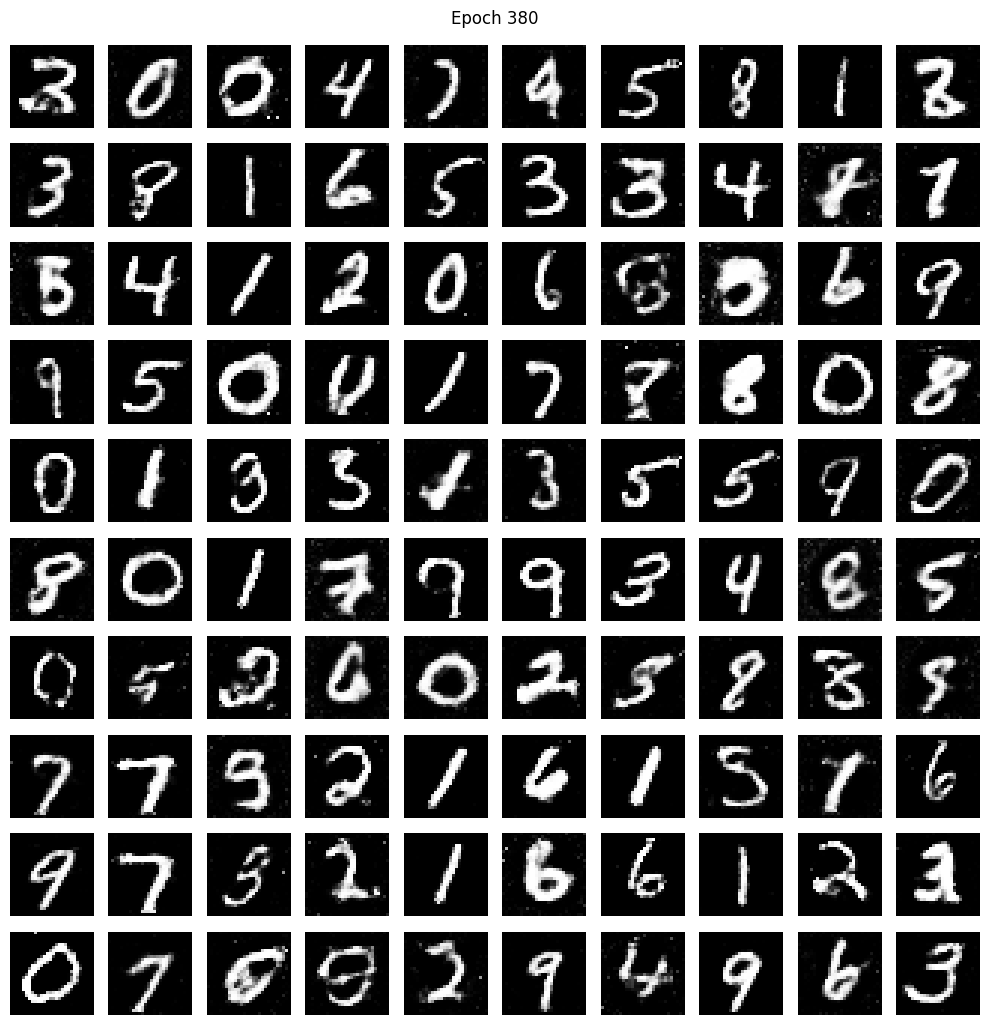

Epoch 381/400


100%|██████████| 128/128 [00:12<00:00, 10.51it/s]


Epoch 382/400


100%|██████████| 128/128 [00:11<00:00, 10.74it/s]


Epoch 383/400


100%|██████████| 128/128 [00:12<00:00, 10.58it/s]


Epoch 384/400


100%|██████████| 128/128 [00:12<00:00, 10.61it/s]


Epoch 385/400


100%|██████████| 128/128 [00:11<00:00, 10.80it/s]


Epoch 386/400


100%|██████████| 128/128 [00:11<00:00, 10.83it/s]


Epoch 387/400


100%|██████████| 128/128 [00:11<00:00, 10.79it/s]


Epoch 388/400


100%|██████████| 128/128 [00:11<00:00, 10.69it/s]


Epoch 389/400


100%|██████████| 128/128 [00:11<00:00, 10.94it/s]


Epoch 390/400


100%|██████████| 128/128 [00:11<00:00, 10.98it/s]


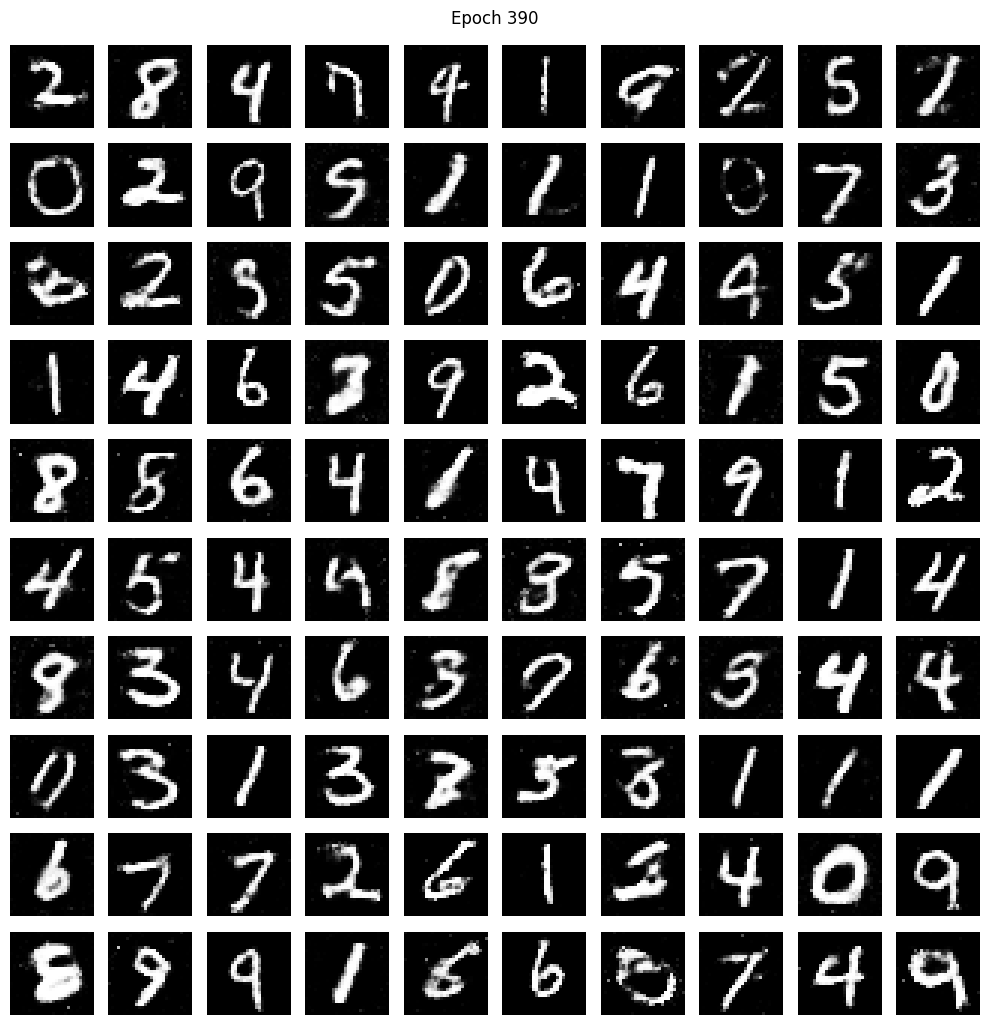

Epoch 391/400


100%|██████████| 128/128 [00:11<00:00, 10.76it/s]


Epoch 392/400


100%|██████████| 128/128 [00:12<00:00, 10.34it/s]


Epoch 393/400


100%|██████████| 128/128 [00:11<00:00, 10.70it/s]


Epoch 394/400


100%|██████████| 128/128 [00:12<00:00, 10.41it/s]


Epoch 395/400


100%|██████████| 128/128 [00:11<00:00, 11.08it/s]


Epoch 396/400


100%|██████████| 128/128 [00:12<00:00,  9.97it/s]


Epoch 397/400


100%|██████████| 128/128 [00:11<00:00, 10.69it/s]


Epoch 398/400


100%|██████████| 128/128 [00:11<00:00, 10.68it/s]


Epoch 399/400


100%|██████████| 128/128 [00:12<00:00, 10.60it/s]


Epoch 400/400


100%|██████████| 128/128 [00:11<00:00, 10.68it/s]


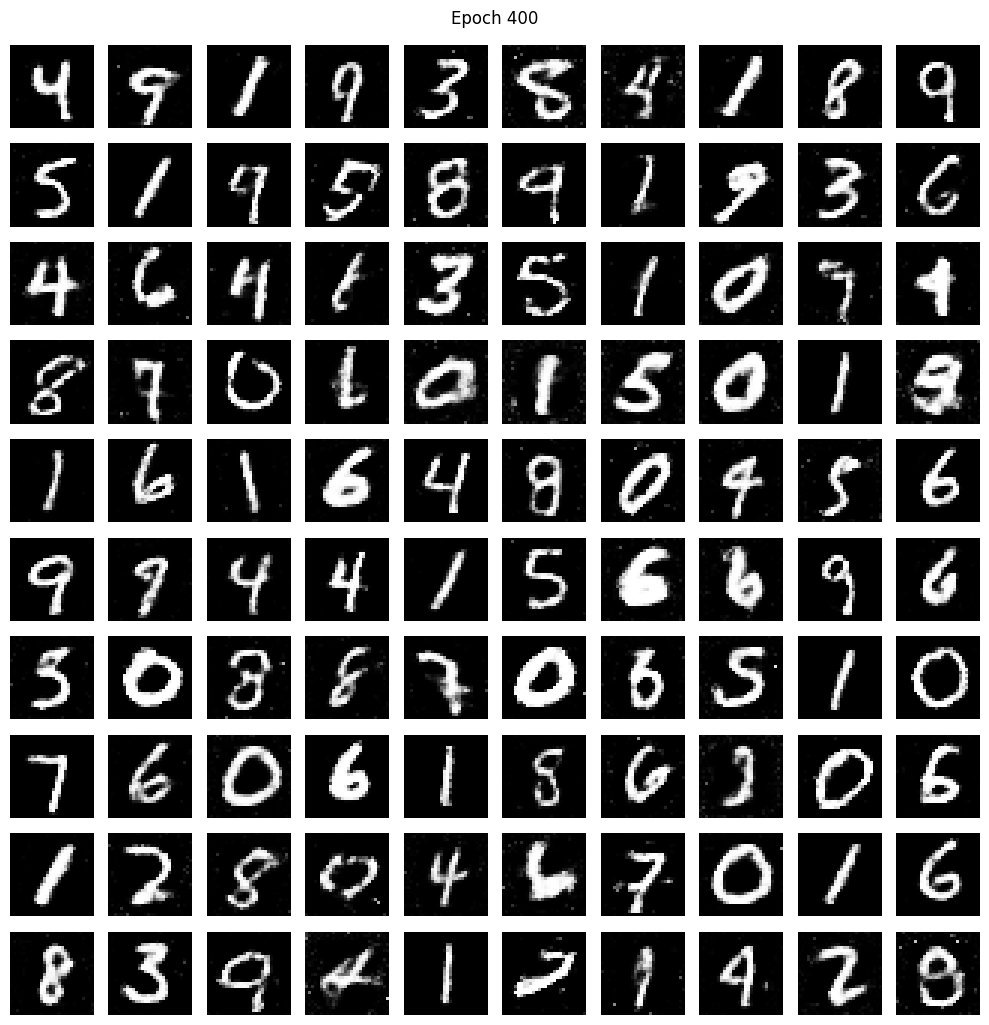

In [6]:
# --- 4. MOKYMAS (TRAINING LOOP) ---

def training(epochs=1, batch_size=128):

    # Sukuriame modelius
    g = create_generator()
    d = create_discriminator()
    gan = create_gan(d, g)

    # Rodyti struktūras
    # g.summary()
    # d.summary()

    for e in range(1, epochs + 1):
        print(f"Epoch {e}/{epochs}")

        # Jūsų pateiktame kode ciklas eina 'batch_size' kartų.
        # Tai reiškia viena "epocha" čia yra 128 žingsniai.
        for _ in tqdm(range(batch_size)):

            # 1. Sugeneruojame triukšmą
            noise = np.random.normal(0, 1, [batch_size, 100])

            # 2. Sugeneruojame netikrus vaizdus
            generated_images = g.predict(noise, verbose=0)

            # 3. Paimame tikrus vaizdus
            image_batch = X_train[np.random.randint(low=0, high=X_train.shape[0], size=batch_size)]

            # 4. Sujungiame (Tikri + Netikri)
            X_concat = np.concatenate([image_batch, generated_images])

            # 5. Sukuriame etiketes (Tikri=0.9, Netikri=0)
            # Naudojame 0.9 vietoj 1.0 (Label Smoothing), tai padeda stabilumui
            y_dis = np.zeros(2 * batch_size)
            y_dis[:batch_size] = 0.9

            # 6. Apmokome Diskriminatorių (atskirti tikrus nuo netikrų)
            d.trainable = True
            d.train_on_batch(X_concat, y_dis)

            # 7. Apmokome Generatorų (per GAN modelį)
            # Bandome apgauti diskriminatorių, sakydami, kad visi vaizdai yra tikri (1)
            noise = np.random.normal(0, 1, [batch_size, 100])
            y_gen = np.ones(batch_size)

            d.trainable = False # Užšaldome diskriminatorių
            gan.train_on_batch(noise, y_gen)

        # Atvaizduojame rezultatą kas 10 epochų (arba pirmą)
        if e == 1 or e % 10 == 0:
            plot_generated_images(e, g)

# --- PALEIDIMAS ---
# 50 epochų užteks pamatyti rezultatą (originale buvo 400, kas užtruks ilgai)
training(epochs=400, batch_size=128)